In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import six
from matplotlib.pyplot import *

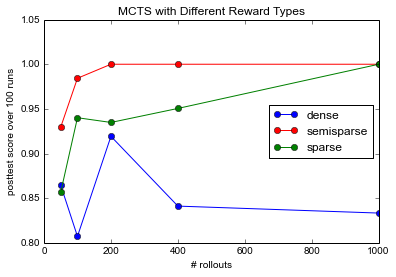

In [8]:
figure()
title('MCTS with Different Reward Types')
xlabel('# rollouts')
ylabel('posttest score over 100 runs')

xs = np.array([50,100,200,400,1000])
densey = np.array([0.8645,0.8072,0.91927,0.8411,0.8333])
semisparsey = np.array([0.9296,0.9843,1,1,1])
sparsey = np.array([0.8567,0.9401,0.9348,0.9505,1])

plot(xs, densey, 'o-', color='blue', label='dense')
plot(xs, semisparsey, 'o-', color='red', label='semisparse')
plot(xs, sparsey, 'o-', color='green', label='sparse')

legend(loc='center right')


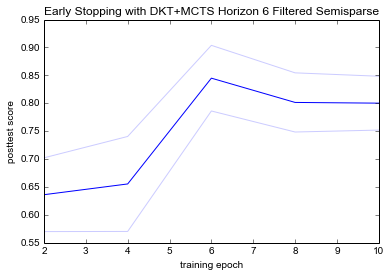

In [3]:
figure()
title('Early Stopping with DKT+MCTS Horizon 6 Filtered Semisparse')
xlabel('training epoch')
ylabel('posttest score')

data = np.array([[0.71875, 0.90104166666666663, 0.88020833333333337, 0.70572916666666663, 0.921875],
[0.71354166666666663, 0.515625, 0.92447916666666663, 0.75, 0.75],
[0.68229166666666663, 0.67447916666666663, 0.75, 0.76302083333333337, 0.75],
[0.68229166666666663, 0.7890625, 0.96614583333333337, 0.953125, 0.76822916666666663],
[0.52864583333333337, 0.73177083333333337, 0.75, 0.75, 0.75],
[0.38020833333333331, 0.75260416666666663, 0.75520833333333337, 0.96614583333333337, 0.75],
[0.59114583333333337, 0.59635416666666663, 0.94270833333333337, 0.75, 0.75],
[0.61458333333333337, 0.515625, 0.76041666666666663, 0.78645833333333337, 0.84635416666666663],
[0.70052083333333337, 0.65104166666666663, 0.97135416666666663, 0.84114583333333337, 0.96614583333333337],
[0.75, 0.42708333333333331, 0.75, 0.75, 0.75]])

xs = np.array([2,4,6,8,10])
ys = np.mean(data,axis=0)
err = np.std(data, axis=0)*1.96/np.sqrt(10)

plot(xs, ys, color='#0000ff')
plot(xs, ys+err, color='#ccccff')
plot(xs, ys-err, color='#ccccff')

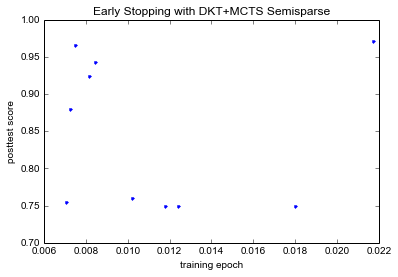

In [4]:
figure()
title('Early Stopping with DKT+MCTS Semisparse')
xlabel('training epoch')
ylabel('posttest score')

loss_data = np.array([
    [0.006952972151339054, 0.003526762593537569, 0.006952972151339054, 0.003526762593537569, 0.0026516641955822706, 0.0020074930507689714, 0.006952972151339054, 0.003526762593537569, 0.0026516641955822706, 0.0020074930507689714, 0.0017566197784617543, 0.0016241687117144465, 0.006952972151339054, 0.003526762593537569, 0.0026516641955822706, 0.0020074930507689714, 0.0017566197784617543, 0.0016241687117144465, 0.00146426260471344, 0.0014151933137327433, 0.006952972151339054, 0.003526762593537569, 0.0026516641955822706, 0.0020074930507689714, 0.0017566197784617543, 0.0016241687117144465, 0.00146426260471344, 0.0014151933137327433, 0.0014574010856449604, 0.0014448337024077773],
[0.008235001005232334, 0.004028839059174061, 0.008235001005232334, 0.004028839059174061, 0.0028823520988225937, 0.002178783295676112, 0.008235001005232334, 0.004028839059174061, 0.0028823520988225937, 0.002178783295676112, 0.0017949586035683751, 0.0016203614650294185, 0.008235001005232334, 0.004028839059174061, 0.0028823520988225937, 0.002178783295676112, 0.0017949586035683751, 0.0016203614650294185, 0.001472671632654965, 0.0014759377809241414, 0.008235001005232334, 0.004028839059174061, 0.0028823520988225937, 0.002178783295676112, 0.0017949586035683751, 0.0016203614650294185, 0.001472671632654965, 0.0014759377809241414, 0.0013668491737917066, 0.0013776248088106513],
[0.011682449840009212, 0.004513988271355629, 0.011682449840009212, 0.004513988271355629, 0.0037237154319882393, 0.0031511178240180016, 0.011682449840009212, 0.004513988271355629, 0.0037237154319882393, 0.0031511178240180016, 0.002249706769362092, 0.0018268838757649064, 0.011682449840009212, 0.004513988271355629, 0.0037237154319882393, 0.0031511178240180016, 0.002249706769362092, 0.0018268838757649064, 0.0016443352214992046, 0.0015804502181708813, 0.011682449840009212, 0.004513988271355629, 0.0037237154319882393, 0.0031511178240180016, 0.002249706769362092, 0.0018268838757649064, 0.0016443352214992046, 0.0015804502181708813, 0.0014468072913587093, 0.0014692156109958887],
[0.008081833831965923, 0.004188272636383772, 0.008081833831965923, 0.004188272636383772, 0.002869195304811001, 0.0024474982637912035, 0.008081833831965923, 0.004188272636383772, 0.002869195304811001, 0.0024474982637912035, 0.001982213230803609, 0.0016977287596091628, 0.008081833831965923, 0.004188272636383772, 0.002869195304811001, 0.0024474982637912035, 0.001982213230803609, 0.0016977287596091628, 0.0016149466391652822, 0.001548025873489678, 0.008081833831965923, 0.004188272636383772, 0.002869195304811001, 0.0024474982637912035, 0.001982213230803609, 0.0016977287596091628, 0.0016149466391652822, 0.001548025873489678, 0.0014809139538556337, 0.0014705227222293615],
[0.018494144082069397, 0.004738542251288891, 0.018494144082069397, 0.004738542251288891, 0.002846496645361185, 0.002127680229023099, 0.018494144082069397, 0.004738542251288891, 0.002846496645361185, 0.002127680229023099, 0.001858229748904705, 0.0017107223393395543, 0.018494144082069397, 0.004738542251288891, 0.002846496645361185, 0.002127680229023099, 0.001858229748904705, 0.0017107223393395543, 0.0015692980960011482, 0.0015190928243100643, 0.018494144082069397, 0.004738542251288891, 0.002846496645361185, 0.002127680229023099, 0.001858229748904705, 0.0017107223393395543, 0.0015692980960011482, 0.0015190928243100643, 0.0014884216943755746, 0.0014669715892523527],
[0.007112464867532253, 0.0038593686185777187, 0.007112464867532253, 0.0038593686185777187, 0.0029074465855956078, 0.0020987694151699543, 0.007112464867532253, 0.0038593686185777187, 0.0029074465855956078, 0.0020987694151699543, 0.0020021123345941305, 0.0019861713517457247, 0.007112464867532253, 0.0038593686185777187, 0.0029074465855956078, 0.0020987694151699543, 0.0020021123345941305, 0.0019861713517457247, 0.0016767843626439571, 0.001609554747119546, 0.007112464867532253, 0.0038593686185777187, 0.0029074465855956078, 0.0020987694151699543, 0.0020021123345941305, 0.0019861713517457247, 0.0016767843626439571, 0.001609554747119546, 0.0016343408497050405, 0.0015082024037837982],
[0.00865961890667677, 0.0038306894712150097, 0.00865961890667677, 0.0038306894712150097, 0.00289260339923203, 0.0023519140668213367, 0.00865961890667677, 0.0038306894712150097, 0.00289260339923203, 0.0023519140668213367, 0.002053834730759263, 0.0019035415025427938, 0.00865961890667677, 0.0038306894712150097, 0.00289260339923203, 0.0023519140668213367, 0.002053834730759263, 0.0019035415025427938, 0.0017370425630360842, 0.0015152277192100883, 0.00865961890667677, 0.0038306894712150097, 0.00289260339923203, 0.0023519140668213367, 0.002053834730759263, 0.0019035415025427938, 0.0017370425630360842, 0.0015152277192100883, 0.0015993715496733785, 0.0015811938792467117],
[0.01036637183278799, 0.00403873436152935, 0.01036637183278799, 0.00403873436152935, 0.0031202908139675856, 0.0025807872880250216, 0.01036637183278799, 0.00403873436152935, 0.0031202908139675856, 0.0025807872880250216, 0.0020145198795944452, 0.0016487473621964455, 0.01036637183278799, 0.00403873436152935, 0.0031202908139675856, 0.0025807872880250216, 0.0020145198795944452, 0.0016487473621964455, 0.0015601115301251411, 0.0015152734704315662, 0.01036637183278799, 0.00403873436152935, 0.0031202908139675856, 0.0025807872880250216, 0.0020145198795944452, 0.0016487473621964455, 0.0015601115301251411, 0.0015152734704315662, 0.001541766570881009, 0.0015186402015388012],
[0.022840715944767, 0.006295953411608934, 0.022840715944767, 0.006295953411608934, 0.0034810304641723633, 0.002753476146608591, 0.022840715944767, 0.006295953411608934, 0.0034810304641723633, 0.002753476146608591, 0.0023695528507232666, 0.0019905546214431524, 0.022840715944767, 0.006295953411608934, 0.0034810304641723633, 0.002753476146608591, 0.0023695528507232666, 0.0019905546214431524, 0.0016559120267629623, 0.001510662492364645, 0.022840715944767, 0.006295953411608934, 0.0034810304641723633, 0.002753476146608591, 0.0023695528507232666, 0.0019905546214431524, 0.0016559120267629623, 0.001510662492364645, 0.0015915264375507832, 0.0015833777142688632],
[0.012541736476123333, 0.0043141343630850315, 0.012541736476123333, 0.0043141343630850315, 0.003006601007655263, 0.0023619539570063353, 0.012541736476123333, 0.0043141343630850315, 0.003006601007655263, 0.0023619539570063353, 0.0017495425418019295, 0.0015220710774883628, 0.012541736476123333, 0.0043141343630850315, 0.003006601007655263, 0.0023619539570063353, 0.0017495425418019295, 0.0015220710774883628, 0.0014694855781272054, 0.0014073768397793174, 0.012541736476123333, 0.0043141343630850315, 0.003006601007655263, 0.0023619539570063353, 0.0017495425418019295, 0.0015220710774883628, 0.0014694855781272054, 0.0014073768397793174, 0.001498986384831369, 0.0015172126004472375],
])

val_data = np.array([
    [0.0072581868112873886, 0.003719702560233273, 0.0072581868112873886, 0.003719702560233273, 0.0027576117450689177, 0.0020705453719400148, 0.0072581868112873886, 0.003719702560233273, 0.0027576117450689177, 0.0020705453719400148, 0.0017539153850608588, 0.0016035515855117699, 0.0072581868112873886, 0.003719702560233273, 0.0027576117450689177, 0.0020705453719400148, 0.0017539153850608588, 0.0016035515855117699, 0.0015185406384447501, 0.0014860939689407544, 0.0072581868112873886, 0.003719702560233273, 0.0027576117450689177, 0.0020705453719400148, 0.0017539153850608588, 0.0016035515855117699, 0.0015185406384447501, 0.0014860939689407544, 0.0014700687820161384, 0.0014615424093930556],
[0.0081459629130319795, 0.0040003205540196296, 0.0081459629130319795, 0.0040003205540196296, 0.0030307108575619523, 0.0023603931350528067, 0.0081459629130319795, 0.0040003205540196296, 0.0030307108575619523, 0.0023603931350528067, 0.0017352962033805935, 0.0015555863603852339, 0.0081459629130319795, 0.0040003205540196296, 0.0030307108575619523, 0.0023603931350528067, 0.0017352962033805935, 0.0015555863603852339, 0.0015176940576253001, 0.0014958145029226708, 0.0081459629130319795, 0.0040003205540196296, 0.0030307108575619523, 0.0023603931350528067, 0.0017352962033805935, 0.0015555863603852339, 0.0015176940576253001, 0.0014958145029226708, 0.0014584975009421443, 0.0014528607812122],
[0.011780782230721808, 0.0044948752684984541, 0.011780782230721808, 0.0044948752684984541, 0.0034214268865296335, 0.0029932631611796368, 0.011780782230721808, 0.0044948752684984541, 0.0034214268865296335, 0.0029932631611796368, 0.0022904566407468377, 0.0018060354533949617, 0.011780782230721808, 0.0044948752684984541, 0.0034214268865296335, 0.0029932631611796368, 0.0022904566407468377, 0.0018060354533949617, 0.001598521352594921, 0.0015205386151204096, 0.011780782230721808, 0.0044948752684984541, 0.0034214268865296335, 0.0029932631611796368, 0.0022904566407468377, 0.0018060354533949617, 0.001598521352594921, 0.0015205386151204096, 0.0015081292578545992, 0.001495573177652539],
[0.007490238396130092, 0.0040061202566488976, 0.007490238396130092, 0.0040061202566488976, 0.0030334855950262139, 0.0024571346784730613, 0.007490238396130092, 0.0040061202566488976, 0.0030334855950262139, 0.0024571346784730613, 0.001985795374934284, 0.0017218946750600689, 0.007490238396130092, 0.0040061202566488976, 0.0030334855950262139, 0.0024571346784730613, 0.001985795374934284, 0.0017218946750600689, 0.0015604280124447225, 0.0014986773472038535, 0.007490238396130092, 0.0040061202566488976, 0.0030334855950262139, 0.0024571346784730613, 0.001985795374934284, 0.0017218946750600689, 0.0015604280124447225, 0.0014986773472038535, 0.0014875066557855001, 0.0014724846164176607],
[0.018001274479046876, 0.0044862217688951709, 0.018001274479046876, 0.0044862217688951709, 0.0029806200682590497, 0.0022845388746146294, 0.018001274479046876, 0.0044862217688951709, 0.0029806200682590497, 0.0022845388746146294, 0.0018911449997063348, 0.0016899985651119599, 0.018001274479046876, 0.0044862217688951709, 0.0029806200682590497, 0.0022845388746146294, 0.0018911449997063348, 0.0016899985651119599, 0.0015926384289937025, 0.0015311014141894156, 0.018001274479046876, 0.0044862217688951709, 0.0029806200682590497, 0.0022845388746146294, 0.0018911449997063348, 0.0016899985651119599, 0.0015926384289937025, 0.0015311014141894156, 0.0015006964813711497, 0.001486182990255876],
[0.0070400233786150858, 0.0038127876777614648, 0.0070400233786150858, 0.0038127876777614648, 0.0030586663121376255, 0.0021766002148999979, 0.0070400233786150858, 0.0038127876777614648, 0.0030586663121376255, 0.0021766002148999979, 0.0019948029195622882, 0.0019317692561547669, 0.0070400233786150858, 0.0038127876777614648, 0.0030586663121376255, 0.0021766002148999979, 0.0019948029195622882, 0.0019317692561547669, 0.0019864320307476533, 0.0019234005308144365, 0.0070400233786150858, 0.0038127876777614648, 0.0030586663121376255, 0.0021766002148999979, 0.0019948029195622882, 0.0019317692561547669, 0.0019864320307476533, 0.0019234005308144365, 0.0016574243039946326, 0.0015476658729636696],
[0.0084448071622518911, 0.0039280443782243307, 0.0084448071622518911, 0.0039280443782243307, 0.0028963347840665369, 0.0023695792357348706, 0.0084448071622518911, 0.0039280443782243307, 0.0028963347840665369, 0.0023695792357348706, 0.0020578047270923615, 0.0019623756979598502, 0.0084448071622518911, 0.0039280443782243307, 0.0028963347840665369, 0.0023695792357348706, 0.0020578047270923615, 0.0019623756979598502, 0.0018406334344898839, 0.0015869621520290702, 0.0084448071622518911, 0.0039280443782243307, 0.0028963347840665369, 0.0023695792357348706, 0.0020578047270923615, 0.0019623756979598502, 0.0018406334344898839, 0.0015869621520290702, 0.0015543960533970357, 0.0015185139584925217],
[0.010215317457316152, 0.0042338090356542546, 0.010215317457316152, 0.0042338090356542546, 0.0030671712441055089, 0.0024855587801950996, 0.010215317457316152, 0.0042338090356542546, 0.0030671712441055089, 0.0024855587801950996, 0.0022004576504046553, 0.0016820498742443587, 0.010215317457316152, 0.0042338090356542546, 0.0030671712441055089, 0.0024855587801950996, 0.0022004576504046553, 0.0016820498742443587, 0.0015464531103431705, 0.0015110440084143174, 0.010215317457316152, 0.0042338090356542546, 0.0030671712441055089, 0.0024855587801950996, 0.0022004576504046553, 0.0016820498742443587, 0.0015464531103431705, 0.0015110440084143174, 0.0015095739475096603, 0.0015016621221638304],
[0.021719986049436701, 0.0057311505520441881, 0.021719986049436701, 0.0057311505520441881, 0.0035247514673984646, 0.0029133431854968519, 0.021719986049436701, 0.0057311505520441881, 0.0035247514673984646, 0.0029133431854968519, 0.0023660341168173175, 0.001974579333649243, 0.021719986049436701, 0.0057311505520441881, 0.0035247514673984646, 0.0029133431854968519, 0.0023660341168173175, 0.001974579333649243, 0.0017234851403456497, 0.0016050210212507265, 0.021719986049436701, 0.0057311505520441881, 0.0035247514673984646, 0.0029133431854968519, 0.0023660341168173175, 0.001974579333649243, 0.0017234851403456497, 0.0016050210212507265, 0.0015355669113795041, 0.0015022950490883548],
[0.012403339823159838, 0.004366570431813867, 0.012403339823159838, 0.004366570431813867, 0.0032018988173782514, 0.0024046646384354073, 0.012403339823159838, 0.004366570431813867, 0.0032018988173782514, 0.0024046646384354073, 0.001770154479881715, 0.001567218353708631, 0.012403339823159838, 0.004366570431813867, 0.0032018988173782514, 0.0024046646384354073, 0.001770154479881715, 0.001567218353708631, 0.0014835739474996345, 0.0014633387399632491, 0.012403339823159838, 0.004366570431813867, 0.0032018988173782514, 0.0024046646384354073, 0.001770154479881715, 0.001567218353708631, 0.0014835739474996345, 0.0014633387399632491, 0.0014658265481024401, 0.0014605038096553999],

])

score_data = np.array([[0.71875, 0.90104166666666663, 0.88020833333333337, 0.70572916666666663, 0.921875],
[0.71354166666666663, 0.515625, 0.92447916666666663, 0.75, 0.75],
[0.68229166666666663, 0.67447916666666663, 0.75, 0.76302083333333337, 0.75],
[0.68229166666666663, 0.7890625, 0.96614583333333337, 0.953125, 0.76822916666666663],
[0.52864583333333337, 0.73177083333333337, 0.75, 0.75, 0.75],
[0.38020833333333331, 0.75260416666666663, 0.75520833333333337, 0.96614583333333337, 0.75],
[0.59114583333333337, 0.59635416666666663, 0.94270833333333337, 0.75, 0.75],
[0.61458333333333337, 0.515625, 0.76041666666666663, 0.78645833333333337, 0.84635416666666663],
[0.70052083333333337, 0.65104166666666663, 0.97135416666666663, 0.84114583333333337, 0.96614583333333337],
[0.75, 0.42708333333333331, 0.75, 0.75, 0.75]])

xs = val_data[:,0]
ys = score_data[:,2]

plot(xs, ys, '.', color='#0000ff')

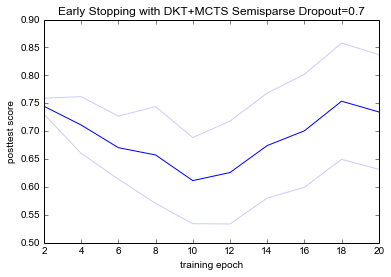

In [2]:
figure()
title('Early Stopping with DKT+MCTS Semisparse Dropout=0.7')
xlabel('training epoch')
ylabel('posttest score')

data = np.array([
    [0.75, 0.75, 0.75, 0.71614583333333337, 0.58072916666666663, 0.65364583333333337, 0.77083333333333337, 0.89322916666666663, 0.890625, 0.90104166666666663],
[0.75, 0.75, 0.75, 0.75, 0.65885416666666663, 0.609375, 0.51041666666666663, 0.66666666666666663, 0.72135416666666663, 0.76041666666666663],
[0.75, 0.75, 0.59895833333333337, 0.484375, 0.50520833333333337, 0.58072916666666663, 0.72395833333333337, 0.59375, 0.95052083333333337, 0.55729166666666663],
[0.75, 0.75, 0.75, 0.75, 0.56510416666666663, 0.54427083333333337, 0.4453125, 0.5, 0.5234375, 0.48958333333333331],
[0.75, 0.5234375, 0.58072916666666663, 0.59375, 0.74479166666666663, 0.75, 0.765625, 0.88802083333333337, 0.875, 0.80729166666666663],
[0.75, 0.75, 0.75, 0.74739583333333337, 0.5, 0.53645833333333337, 0.55729166666666663, 0.5546875, 0.6328125, 0.625],
[0.75, 0.51041666666666663, 0.55989583333333337, 0.93489583333333337, 0.95572916666666663, 0.97395833333333337, 0.953125, 0.95833333333333337, 0.98958333333333337, 0.98697916666666663],
[0.75, 0.75, 0.73958333333333337, 0.58072916666666663, 0.53125, 0.58072916666666663, 0.73177083333333337, 0.7421875, 0.74739583333333337, 0.76822916666666663],
[0.75, 0.75, 0.6484375, 0.72916666666666663, 0.640625, 0.77864583333333337, 0.8046875, 0.96354166666666663, 0.984375, 0.99479166666666663],
[0.64322916666666663, 0.52083333333333337, 0.5390625, 0.55729166666666663, 0.5078125, 0.68229166666666663, 0.71614583333333337, 0.64583333333333337, 0.90364583333333337, 0.8671875],
[0.75, 0.75, 0.74739583333333337, 0.73177083333333337, 0.50520833333333337, 0.5234375, 0.50520833333333337, 0.51041666666666663, 0.55208333333333337, 0.62760416666666663],
[0.75, 0.75, 0.5, 0.7109375, 0.58854166666666663, 0.59114583333333337, 0.671875, 0.73697916666666663, 0.61979166666666663, 0.63802083333333337],
[0.75, 0.75, 0.75, 0.56510416666666663, 0.59114583333333337, 0.52604166666666663, 0.52083333333333337, 0.58072916666666663, 0.734375, 0.77604166666666663],
[0.75, 0.75, 0.75, 0.75, 0.61458333333333337, 0.44791666666666669, 0.53645833333333337, 0.47916666666666669, 0.52083333333333337, 0.49479166666666669],
[0.75, 0.75, 0.74739583333333337, 0.79947916666666663, 0.86197916666666663, 0.96875, 0.98958333333333337, 0.90625, 0.8359375, 0.7734375],
[0.75, 0.75, 0.73177083333333337, 0.27604166666666669, 0.59895833333333337, 0.5546875, 0.72916666666666663, 0.75, 0.96614583333333337, 0.95052083333333337],
[0.75, 0.75, 0.75, 0.75, 0.75260416666666663, 0.76302083333333337, 0.765625, 0.7578125, 0.77864583333333337, 0.828125],
[0.75, 0.75, 0.63541666666666663, 0.65104166666666663, 0.5234375, 0.52083333333333337, 0.734375, 0.75, 0.79947916666666663, 0.84375],
[0.75, 0.69791666666666663, 0.6171875, 0.5546875, 0.49739583333333331, 0.43229166666666669, 0.43229166666666669, 0.39322916666666669, 0.42447916666666669, 0.45572916666666669],
[0.75, 0.71875, 0.51302083333333337, 0.515625, 0.50520833333333337, 0.5, 0.61979166666666663, 0.7421875, 0.625, 0.54427083333333337],
])

xs = np.array([2,4,6,8,10,12,14,16,18,20])
ys = np.mean(data,axis=0)
err = np.std(data, axis=0)*1.96/np.sqrt(10)

plot(xs, ys, color='#0000ff')
plot(xs, ys+err, color='#ccccff')
plot(xs, ys-err, color='#ccccff')

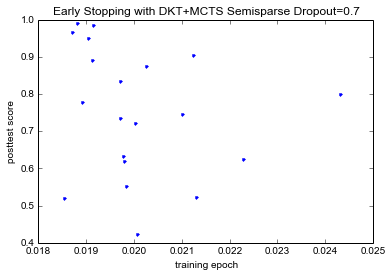

In [13]:
figure()
title('Early Stopping with DKT+MCTS Semisparse Dropout=0.7')
xlabel('training epoch')
ylabel('posttest score')

loss_data = np.array([
    [0.04539704695343971, 0.04251258447766304, 0.04539704695343971, 0.04251258447766304, 0.041467513889074326, 0.04256761446595192, 0.04539704695343971, 0.04251258447766304, 0.041467513889074326, 0.04256761446595192, 0.04293842986226082, 0.04206319898366928, 0.04539704695343971, 0.04251258447766304, 0.041467513889074326, 0.04256761446595192, 0.04293842986226082, 0.04206319898366928, 0.04090987890958786, 0.04180280864238739, 0.04539704695343971, 0.04251258447766304, 0.041467513889074326, 0.04256761446595192, 0.04293842986226082, 0.04206319898366928, 0.04090987890958786, 0.04180280864238739, 0.04322395846247673, 0.04081760346889496, 0.04539704695343971, 0.04251258447766304, 0.041467513889074326, 0.04256761446595192, 0.04293842986226082, 0.04206319898366928, 0.04090987890958786, 0.04180280864238739, 0.04322395846247673, 0.04081760346889496, 0.040213000029325485, 0.039118342101573944, 0.04539704695343971, 0.04251258447766304, 0.041467513889074326, 0.04256761446595192, 0.04293842986226082, 0.04206319898366928, 0.04090987890958786, 0.04180280864238739, 0.04322395846247673, 0.04081760346889496, 0.040213000029325485, 0.039118342101573944, 0.039024218916893005, 0.040574196726083755, 0.04539704695343971, 0.04251258447766304, 0.041467513889074326, 0.04256761446595192, 0.04293842986226082, 0.04206319898366928, 0.04090987890958786, 0.04180280864238739, 0.04322395846247673, 0.04081760346889496, 0.040213000029325485, 0.039118342101573944, 0.039024218916893005, 0.040574196726083755, 0.040648579597473145, 0.041498735547065735, 0.04539704695343971, 0.04251258447766304, 0.041467513889074326, 0.04256761446595192, 0.04293842986226082, 0.04206319898366928, 0.04090987890958786, 0.04180280864238739, 0.04322395846247673, 0.04081760346889496, 0.040213000029325485, 0.039118342101573944, 0.039024218916893005, 0.040574196726083755, 0.040648579597473145, 0.041498735547065735, 0.04204414412379265, 0.04272889718413353, 0.04539704695343971, 0.04251258447766304, 0.041467513889074326, 0.04256761446595192, 0.04293842986226082, 0.04206319898366928, 0.04090987890958786, 0.04180280864238739, 0.04322395846247673, 0.04081760346889496, 0.040213000029325485, 0.039118342101573944, 0.039024218916893005, 0.040574196726083755, 0.040648579597473145, 0.041498735547065735, 0.04204414412379265, 0.04272889718413353, 0.03998156264424324, 0.039888881146907806],
[0.04680604860186577, 0.04432575777173042, 0.04680604860186577, 0.04432575777173042, 0.0437014177441597, 0.042589038610458374, 0.04680604860186577, 0.04432575777173042, 0.0437014177441597, 0.042589038610458374, 0.0425998754799366, 0.04333765059709549, 0.04680604860186577, 0.04432575777173042, 0.0437014177441597, 0.042589038610458374, 0.0425998754799366, 0.04333765059709549, 0.04186038672924042, 0.04099408909678459, 0.04680604860186577, 0.04432575777173042, 0.0437014177441597, 0.042589038610458374, 0.0425998754799366, 0.04333765059709549, 0.04186038672924042, 0.04099408909678459, 0.04076287895441055, 0.04049982503056526, 0.04680604860186577, 0.04432575777173042, 0.0437014177441597, 0.042589038610458374, 0.0425998754799366, 0.04333765059709549, 0.04186038672924042, 0.04099408909678459, 0.04076287895441055, 0.04049982503056526, 0.04155970364809036, 0.04149972274899483, 0.04680604860186577, 0.04432575777173042, 0.0437014177441597, 0.042589038610458374, 0.0425998754799366, 0.04333765059709549, 0.04186038672924042, 0.04099408909678459, 0.04076287895441055, 0.04049982503056526, 0.04155970364809036, 0.04149972274899483, 0.042052026838064194, 0.041142866015434265, 0.04680604860186577, 0.04432575777173042, 0.0437014177441597, 0.042589038610458374, 0.0425998754799366, 0.04333765059709549, 0.04186038672924042, 0.04099408909678459, 0.04076287895441055, 0.04049982503056526, 0.04155970364809036, 0.04149972274899483, 0.042052026838064194, 0.041142866015434265, 0.04107488691806793, 0.039774466305971146, 0.04680604860186577, 0.04432575777173042, 0.0437014177441597, 0.042589038610458374, 0.0425998754799366, 0.04333765059709549, 0.04186038672924042, 0.04099408909678459, 0.04076287895441055, 0.04049982503056526, 0.04155970364809036, 0.04149972274899483, 0.042052026838064194, 0.041142866015434265, 0.04107488691806793, 0.039774466305971146, 0.04017437994480133, 0.04092016443610191, 0.04680604860186577, 0.04432575777173042, 0.0437014177441597, 0.042589038610458374, 0.0425998754799366, 0.04333765059709549, 0.04186038672924042, 0.04099408909678459, 0.04076287895441055, 0.04049982503056526, 0.04155970364809036, 0.04149972274899483, 0.042052026838064194, 0.041142866015434265, 0.04107488691806793, 0.039774466305971146, 0.04017437994480133, 0.04092016443610191, 0.03970811888575554, 0.04050937667489052],
[0.04402661696076393, 0.044334545731544495, 0.04402661696076393, 0.044334545731544495, 0.042207226157188416, 0.04238595440983772, 0.04402661696076393, 0.044334545731544495, 0.042207226157188416, 0.04238595440983772, 0.04296024888753891, 0.041463371366262436, 0.04402661696076393, 0.044334545731544495, 0.042207226157188416, 0.04238595440983772, 0.04296024888753891, 0.041463371366262436, 0.04202507436275482, 0.04155410826206207, 0.04402661696076393, 0.044334545731544495, 0.042207226157188416, 0.04238595440983772, 0.04296024888753891, 0.041463371366262436, 0.04202507436275482, 0.04155410826206207, 0.040265362709760666, 0.04221860319375992, 0.04402661696076393, 0.044334545731544495, 0.042207226157188416, 0.04238595440983772, 0.04296024888753891, 0.041463371366262436, 0.04202507436275482, 0.04155410826206207, 0.040265362709760666, 0.04221860319375992, 0.040273088961839676, 0.04083434119820595, 0.04402661696076393, 0.044334545731544495, 0.042207226157188416, 0.04238595440983772, 0.04296024888753891, 0.041463371366262436, 0.04202507436275482, 0.04155410826206207, 0.040265362709760666, 0.04221860319375992, 0.040273088961839676, 0.04083434119820595, 0.0413343571126461, 0.04055917635560036, 0.04402661696076393, 0.044334545731544495, 0.042207226157188416, 0.04238595440983772, 0.04296024888753891, 0.041463371366262436, 0.04202507436275482, 0.04155410826206207, 0.040265362709760666, 0.04221860319375992, 0.040273088961839676, 0.04083434119820595, 0.0413343571126461, 0.04055917635560036, 0.040773726999759674, 0.04153953865170479, 0.04402661696076393, 0.044334545731544495, 0.042207226157188416, 0.04238595440983772, 0.04296024888753891, 0.041463371366262436, 0.04202507436275482, 0.04155410826206207, 0.040265362709760666, 0.04221860319375992, 0.040273088961839676, 0.04083434119820595, 0.0413343571126461, 0.04055917635560036, 0.040773726999759674, 0.04153953865170479, 0.040719758719205856, 0.040794745087623596, 0.04402661696076393, 0.044334545731544495, 0.042207226157188416, 0.04238595440983772, 0.04296024888753891, 0.041463371366262436, 0.04202507436275482, 0.04155410826206207, 0.040265362709760666, 0.04221860319375992, 0.040273088961839676, 0.04083434119820595, 0.0413343571126461, 0.04055917635560036, 0.040773726999759674, 0.04153953865170479, 0.040719758719205856, 0.040794745087623596, 0.04018321633338928, 0.040010347962379456],
[0.04488755017518997, 0.04236384853720665, 0.04488755017518997, 0.04236384853720665, 0.04453441500663757, 0.04358697682619095, 0.04488755017518997, 0.04236384853720665, 0.04453441500663757, 0.04358697682619095, 0.04180131107568741, 0.040405645966529846, 0.04488755017518997, 0.04236384853720665, 0.04453441500663757, 0.04358697682619095, 0.04180131107568741, 0.040405645966529846, 0.04122396185994148, 0.04050268977880478, 0.04488755017518997, 0.04236384853720665, 0.04453441500663757, 0.04358697682619095, 0.04180131107568741, 0.040405645966529846, 0.04122396185994148, 0.04050268977880478, 0.04368940740823746, 0.042795076966285706, 0.04488755017518997, 0.04236384853720665, 0.04453441500663757, 0.04358697682619095, 0.04180131107568741, 0.040405645966529846, 0.04122396185994148, 0.04050268977880478, 0.04368940740823746, 0.042795076966285706, 0.03981100022792816, 0.04043632000684738, 0.04488755017518997, 0.04236384853720665, 0.04453441500663757, 0.04358697682619095, 0.04180131107568741, 0.040405645966529846, 0.04122396185994148, 0.04050268977880478, 0.04368940740823746, 0.042795076966285706, 0.03981100022792816, 0.04043632000684738, 0.04048095643520355, 0.04118617624044418, 0.04488755017518997, 0.04236384853720665, 0.04453441500663757, 0.04358697682619095, 0.04180131107568741, 0.040405645966529846, 0.04122396185994148, 0.04050268977880478, 0.04368940740823746, 0.042795076966285706, 0.03981100022792816, 0.04043632000684738, 0.04048095643520355, 0.04118617624044418, 0.04154627025127411, 0.04160894453525543, 0.04488755017518997, 0.04236384853720665, 0.04453441500663757, 0.04358697682619095, 0.04180131107568741, 0.040405645966529846, 0.04122396185994148, 0.04050268977880478, 0.04368940740823746, 0.042795076966285706, 0.03981100022792816, 0.04043632000684738, 0.04048095643520355, 0.04118617624044418, 0.04154627025127411, 0.04160894453525543, 0.04167431592941284, 0.040854502469301224, 0.04488755017518997, 0.04236384853720665, 0.04453441500663757, 0.04358697682619095, 0.04180131107568741, 0.040405645966529846, 0.04122396185994148, 0.04050268977880478, 0.04368940740823746, 0.042795076966285706, 0.03981100022792816, 0.04043632000684738, 0.04048095643520355, 0.04118617624044418, 0.04154627025127411, 0.04160894453525543, 0.04167431592941284, 0.040854502469301224, 0.039873458445072174, 0.041413236409425735],
[0.0447203628718853, 0.04462888836860657, 0.0447203628718853, 0.04462888836860657, 0.04333839192986488, 0.042907826602458954, 0.0447203628718853, 0.04462888836860657, 0.04333839192986488, 0.042907826602458954, 0.042464032769203186, 0.040742989629507065, 0.0447203628718853, 0.04462888836860657, 0.04333839192986488, 0.042907826602458954, 0.042464032769203186, 0.040742989629507065, 0.04146585986018181, 0.041748736053705215, 0.0447203628718853, 0.04462888836860657, 0.04333839192986488, 0.042907826602458954, 0.042464032769203186, 0.040742989629507065, 0.04146585986018181, 0.041748736053705215, 0.03924417495727539, 0.04016049951314926, 0.0447203628718853, 0.04462888836860657, 0.04333839192986488, 0.042907826602458954, 0.042464032769203186, 0.040742989629507065, 0.04146585986018181, 0.041748736053705215, 0.03924417495727539, 0.04016049951314926, 0.039919715374708176, 0.040628399699926376, 0.0447203628718853, 0.04462888836860657, 0.04333839192986488, 0.042907826602458954, 0.042464032769203186, 0.040742989629507065, 0.04146585986018181, 0.041748736053705215, 0.03924417495727539, 0.04016049951314926, 0.039919715374708176, 0.040628399699926376, 0.04066719487309456, 0.04193529486656189, 0.0447203628718853, 0.04462888836860657, 0.04333839192986488, 0.042907826602458954, 0.042464032769203186, 0.040742989629507065, 0.04146585986018181, 0.041748736053705215, 0.03924417495727539, 0.04016049951314926, 0.039919715374708176, 0.040628399699926376, 0.04066719487309456, 0.04193529486656189, 0.04130985587835312, 0.04150239750742912, 0.0447203628718853, 0.04462888836860657, 0.04333839192986488, 0.042907826602458954, 0.042464032769203186, 0.040742989629507065, 0.04146585986018181, 0.041748736053705215, 0.03924417495727539, 0.04016049951314926, 0.039919715374708176, 0.040628399699926376, 0.04066719487309456, 0.04193529486656189, 0.04130985587835312, 0.04150239750742912, 0.03964805603027344, 0.03934594988822937, 0.0447203628718853, 0.04462888836860657, 0.04333839192986488, 0.042907826602458954, 0.042464032769203186, 0.040742989629507065, 0.04146585986018181, 0.041748736053705215, 0.03924417495727539, 0.04016049951314926, 0.039919715374708176, 0.040628399699926376, 0.04066719487309456, 0.04193529486656189, 0.04130985587835312, 0.04150239750742912, 0.03964805603027344, 0.03934594988822937, 0.04034901782870293, 0.04099360853433609],
[0.04455266520380974, 0.04379454627633095, 0.04455266520380974, 0.04379454627633095, 0.040694065392017365, 0.04330863431096077, 0.04455266520380974, 0.04379454627633095, 0.040694065392017365, 0.04330863431096077, 0.04229268059134483, 0.040239810943603516, 0.04455266520380974, 0.04379454627633095, 0.040694065392017365, 0.04330863431096077, 0.04229268059134483, 0.040239810943603516, 0.04352336749434471, 0.04145343229174614, 0.04455266520380974, 0.04379454627633095, 0.040694065392017365, 0.04330863431096077, 0.04229268059134483, 0.040239810943603516, 0.04352336749434471, 0.04145343229174614, 0.04127282649278641, 0.04127879813313484, 0.04455266520380974, 0.04379454627633095, 0.040694065392017365, 0.04330863431096077, 0.04229268059134483, 0.040239810943603516, 0.04352336749434471, 0.04145343229174614, 0.04127282649278641, 0.04127879813313484, 0.03942102566361427, 0.04021007940173149, 0.04455266520380974, 0.04379454627633095, 0.040694065392017365, 0.04330863431096077, 0.04229268059134483, 0.040239810943603516, 0.04352336749434471, 0.04145343229174614, 0.04127282649278641, 0.04127879813313484, 0.03942102566361427, 0.04021007940173149, 0.03971945494413376, 0.039861734956502914, 0.04455266520380974, 0.04379454627633095, 0.040694065392017365, 0.04330863431096077, 0.04229268059134483, 0.040239810943603516, 0.04352336749434471, 0.04145343229174614, 0.04127282649278641, 0.04127879813313484, 0.03942102566361427, 0.04021007940173149, 0.03971945494413376, 0.039861734956502914, 0.04248654469847679, 0.041208650916814804, 0.04455266520380974, 0.04379454627633095, 0.040694065392017365, 0.04330863431096077, 0.04229268059134483, 0.040239810943603516, 0.04352336749434471, 0.04145343229174614, 0.04127282649278641, 0.04127879813313484, 0.03942102566361427, 0.04021007940173149, 0.03971945494413376, 0.039861734956502914, 0.04248654469847679, 0.041208650916814804, 0.040578246116638184, 0.0400945283472538, 0.04455266520380974, 0.04379454627633095, 0.040694065392017365, 0.04330863431096077, 0.04229268059134483, 0.040239810943603516, 0.04352336749434471, 0.04145343229174614, 0.04127282649278641, 0.04127879813313484, 0.03942102566361427, 0.04021007940173149, 0.03971945494413376, 0.039861734956502914, 0.04248654469847679, 0.041208650916814804, 0.040578246116638184, 0.0400945283472538, 0.04070023074746132, 0.0398794487118721],
[0.046345923095941544, 0.043872490525245667, 0.046345923095941544, 0.043872490525245667, 0.0416552759706974, 0.04192785546183586, 0.046345923095941544, 0.043872490525245667, 0.0416552759706974, 0.04192785546183586, 0.0422067865729332, 0.041789088398218155, 0.046345923095941544, 0.043872490525245667, 0.0416552759706974, 0.04192785546183586, 0.0422067865729332, 0.041789088398218155, 0.04098993539810181, 0.039149604737758636, 0.046345923095941544, 0.043872490525245667, 0.0416552759706974, 0.04192785546183586, 0.0422067865729332, 0.041789088398218155, 0.04098993539810181, 0.039149604737758636, 0.04082869738340378, 0.04069141298532486, 0.046345923095941544, 0.043872490525245667, 0.0416552759706974, 0.04192785546183586, 0.0422067865729332, 0.041789088398218155, 0.04098993539810181, 0.039149604737758636, 0.04082869738340378, 0.04069141298532486, 0.04143543168902397, 0.04112779721617699, 0.046345923095941544, 0.043872490525245667, 0.0416552759706974, 0.04192785546183586, 0.0422067865729332, 0.041789088398218155, 0.04098993539810181, 0.039149604737758636, 0.04082869738340378, 0.04069141298532486, 0.04143543168902397, 0.04112779721617699, 0.04164953902363777, 0.041145745664834976, 0.046345923095941544, 0.043872490525245667, 0.0416552759706974, 0.04192785546183586, 0.0422067865729332, 0.041789088398218155, 0.04098993539810181, 0.039149604737758636, 0.04082869738340378, 0.04069141298532486, 0.04143543168902397, 0.04112779721617699, 0.04164953902363777, 0.041145745664834976, 0.04018096625804901, 0.041352879256010056, 0.046345923095941544, 0.043872490525245667, 0.0416552759706974, 0.04192785546183586, 0.0422067865729332, 0.041789088398218155, 0.04098993539810181, 0.039149604737758636, 0.04082869738340378, 0.04069141298532486, 0.04143543168902397, 0.04112779721617699, 0.04164953902363777, 0.041145745664834976, 0.04018096625804901, 0.041352879256010056, 0.04073647782206535, 0.040818143635988235, 0.046345923095941544, 0.043872490525245667, 0.0416552759706974, 0.04192785546183586, 0.0422067865729332, 0.041789088398218155, 0.04098993539810181, 0.039149604737758636, 0.04082869738340378, 0.04069141298532486, 0.04143543168902397, 0.04112779721617699, 0.04164953902363777, 0.041145745664834976, 0.04018096625804901, 0.041352879256010056, 0.04073647782206535, 0.040818143635988235, 0.04207555577158928, 0.04013456776738167],
[0.044699668884277344, 0.04288468137383461, 0.044699668884277344, 0.04288468137383461, 0.042518336325883865, 0.04222864285111427, 0.044699668884277344, 0.04288468137383461, 0.042518336325883865, 0.04222864285111427, 0.041270334273576736, 0.04061828553676605, 0.044699668884277344, 0.04288468137383461, 0.042518336325883865, 0.04222864285111427, 0.041270334273576736, 0.04061828553676605, 0.03978400304913521, 0.042342670261859894, 0.044699668884277344, 0.04288468137383461, 0.042518336325883865, 0.04222864285111427, 0.041270334273576736, 0.04061828553676605, 0.03978400304913521, 0.042342670261859894, 0.041292350739240646, 0.04165591299533844, 0.044699668884277344, 0.04288468137383461, 0.042518336325883865, 0.04222864285111427, 0.041270334273576736, 0.04061828553676605, 0.03978400304913521, 0.042342670261859894, 0.041292350739240646, 0.04165591299533844, 0.04134376347064972, 0.04068097844719887, 0.044699668884277344, 0.04288468137383461, 0.042518336325883865, 0.04222864285111427, 0.041270334273576736, 0.04061828553676605, 0.03978400304913521, 0.042342670261859894, 0.041292350739240646, 0.04165591299533844, 0.04134376347064972, 0.04068097844719887, 0.04143408685922623, 0.04048318415880203, 0.044699668884277344, 0.04288468137383461, 0.042518336325883865, 0.04222864285111427, 0.041270334273576736, 0.04061828553676605, 0.03978400304913521, 0.042342670261859894, 0.041292350739240646, 0.04165591299533844, 0.04134376347064972, 0.04068097844719887, 0.04143408685922623, 0.04048318415880203, 0.04123847186565399, 0.041324447840452194, 0.044699668884277344, 0.04288468137383461, 0.042518336325883865, 0.04222864285111427, 0.041270334273576736, 0.04061828553676605, 0.03978400304913521, 0.042342670261859894, 0.041292350739240646, 0.04165591299533844, 0.04134376347064972, 0.04068097844719887, 0.04143408685922623, 0.04048318415880203, 0.04123847186565399, 0.041324447840452194, 0.03974098712205887, 0.040816910564899445, 0.044699668884277344, 0.04288468137383461, 0.042518336325883865, 0.04222864285111427, 0.041270334273576736, 0.04061828553676605, 0.03978400304913521, 0.042342670261859894, 0.041292350739240646, 0.04165591299533844, 0.04134376347064972, 0.04068097844719887, 0.04143408685922623, 0.04048318415880203, 0.04123847186565399, 0.041324447840452194, 0.03974098712205887, 0.040816910564899445, 0.039528634399175644, 0.04076072946190834],
[0.04464852437376976, 0.04359666258096695, 0.04464852437376976, 0.04359666258096695, 0.0435577854514122, 0.04101382941007614, 0.04464852437376976, 0.04359666258096695, 0.0435577854514122, 0.04101382941007614, 0.042870569974184036, 0.041269056499004364, 0.04464852437376976, 0.04359666258096695, 0.0435577854514122, 0.04101382941007614, 0.042870569974184036, 0.041269056499004364, 0.041528694331645966, 0.041800834238529205, 0.04464852437376976, 0.04359666258096695, 0.0435577854514122, 0.04101382941007614, 0.042870569974184036, 0.041269056499004364, 0.041528694331645966, 0.041800834238529205, 0.04141873121261597, 0.04206345975399017, 0.04464852437376976, 0.04359666258096695, 0.0435577854514122, 0.04101382941007614, 0.042870569974184036, 0.041269056499004364, 0.041528694331645966, 0.041800834238529205, 0.04141873121261597, 0.04206345975399017, 0.041336044669151306, 0.041144952178001404, 0.04464852437376976, 0.04359666258096695, 0.0435577854514122, 0.04101382941007614, 0.042870569974184036, 0.041269056499004364, 0.041528694331645966, 0.041800834238529205, 0.04141873121261597, 0.04206345975399017, 0.041336044669151306, 0.041144952178001404, 0.04151670262217522, 0.0408894419670105, 0.04464852437376976, 0.04359666258096695, 0.0435577854514122, 0.04101382941007614, 0.042870569974184036, 0.041269056499004364, 0.041528694331645966, 0.041800834238529205, 0.04141873121261597, 0.04206345975399017, 0.041336044669151306, 0.041144952178001404, 0.04151670262217522, 0.0408894419670105, 0.04078797996044159, 0.03916015103459358, 0.04464852437376976, 0.04359666258096695, 0.0435577854514122, 0.04101382941007614, 0.042870569974184036, 0.041269056499004364, 0.041528694331645966, 0.041800834238529205, 0.04141873121261597, 0.04206345975399017, 0.041336044669151306, 0.041144952178001404, 0.04151670262217522, 0.0408894419670105, 0.04078797996044159, 0.03916015103459358, 0.040476661175489426, 0.04026765748858452, 0.04464852437376976, 0.04359666258096695, 0.0435577854514122, 0.04101382941007614, 0.042870569974184036, 0.041269056499004364, 0.041528694331645966, 0.041800834238529205, 0.04141873121261597, 0.04206345975399017, 0.041336044669151306, 0.041144952178001404, 0.04151670262217522, 0.0408894419670105, 0.04078797996044159, 0.03916015103459358, 0.040476661175489426, 0.04026765748858452, 0.04136758670210838, 0.04062417522072792],
[0.04812326282262802, 0.04308877885341644, 0.04812326282262802, 0.04308877885341644, 0.04250158369541168, 0.040192048996686935, 0.04812326282262802, 0.04308877885341644, 0.04250158369541168, 0.040192048996686935, 0.04088601842522621, 0.042594064027071, 0.04812326282262802, 0.04308877885341644, 0.04250158369541168, 0.040192048996686935, 0.04088601842522621, 0.042594064027071, 0.040436066687107086, 0.039686936885118484, 0.04812326282262802, 0.04308877885341644, 0.04250158369541168, 0.040192048996686935, 0.04088601842522621, 0.042594064027071, 0.040436066687107086, 0.039686936885118484, 0.04122449830174446, 0.0416475273668766, 0.04812326282262802, 0.04308877885341644, 0.04250158369541168, 0.040192048996686935, 0.04088601842522621, 0.042594064027071, 0.040436066687107086, 0.039686936885118484, 0.04122449830174446, 0.0416475273668766, 0.0410274975001812, 0.040062908083200455, 0.04812326282262802, 0.04308877885341644, 0.04250158369541168, 0.040192048996686935, 0.04088601842522621, 0.042594064027071, 0.040436066687107086, 0.039686936885118484, 0.04122449830174446, 0.0416475273668766, 0.0410274975001812, 0.040062908083200455, 0.041494499891996384, 0.040598899126052856, 0.04812326282262802, 0.04308877885341644, 0.04250158369541168, 0.040192048996686935, 0.04088601842522621, 0.042594064027071, 0.040436066687107086, 0.039686936885118484, 0.04122449830174446, 0.0416475273668766, 0.0410274975001812, 0.040062908083200455, 0.041494499891996384, 0.040598899126052856, 0.04177958518266678, 0.04175158590078354, 0.04812326282262802, 0.04308877885341644, 0.04250158369541168, 0.040192048996686935, 0.04088601842522621, 0.042594064027071, 0.040436066687107086, 0.039686936885118484, 0.04122449830174446, 0.0416475273668766, 0.0410274975001812, 0.040062908083200455, 0.041494499891996384, 0.040598899126052856, 0.04177958518266678, 0.04175158590078354, 0.039942655712366104, 0.03941141068935394, 0.04812326282262802, 0.04308877885341644, 0.04250158369541168, 0.040192048996686935, 0.04088601842522621, 0.042594064027071, 0.040436066687107086, 0.039686936885118484, 0.04122449830174446, 0.0416475273668766, 0.0410274975001812, 0.040062908083200455, 0.041494499891996384, 0.040598899126052856, 0.04177958518266678, 0.04175158590078354, 0.039942655712366104, 0.03941141068935394, 0.04037361219525337, 0.04030143469572067],
[0.04483373090624809, 0.04286288842558861, 0.04483373090624809, 0.04286288842558861, 0.0416121706366539, 0.04180850088596344, 0.04483373090624809, 0.04286288842558861, 0.0416121706366539, 0.04180850088596344, 0.04213176295161247, 0.04273360222578049, 0.04483373090624809, 0.04286288842558861, 0.0416121706366539, 0.04180850088596344, 0.04213176295161247, 0.04273360222578049, 0.042417220771312714, 0.042358748614788055, 0.04483373090624809, 0.04286288842558861, 0.0416121706366539, 0.04180850088596344, 0.04213176295161247, 0.04273360222578049, 0.042417220771312714, 0.042358748614788055, 0.04223490506410599, 0.04125172272324562, 0.04483373090624809, 0.04286288842558861, 0.0416121706366539, 0.04180850088596344, 0.04213176295161247, 0.04273360222578049, 0.042417220771312714, 0.042358748614788055, 0.04223490506410599, 0.04125172272324562, 0.041621413081884384, 0.03985694423317909, 0.04483373090624809, 0.04286288842558861, 0.0416121706366539, 0.04180850088596344, 0.04213176295161247, 0.04273360222578049, 0.042417220771312714, 0.042358748614788055, 0.04223490506410599, 0.04125172272324562, 0.041621413081884384, 0.03985694423317909, 0.04047347605228424, 0.0385623574256897, 0.04483373090624809, 0.04286288842558861, 0.0416121706366539, 0.04180850088596344, 0.04213176295161247, 0.04273360222578049, 0.042417220771312714, 0.042358748614788055, 0.04223490506410599, 0.04125172272324562, 0.041621413081884384, 0.03985694423317909, 0.04047347605228424, 0.0385623574256897, 0.041917819529771805, 0.04267458990216255, 0.04483373090624809, 0.04286288842558861, 0.0416121706366539, 0.04180850088596344, 0.04213176295161247, 0.04273360222578049, 0.042417220771312714, 0.042358748614788055, 0.04223490506410599, 0.04125172272324562, 0.041621413081884384, 0.03985694423317909, 0.04047347605228424, 0.0385623574256897, 0.041917819529771805, 0.04267458990216255, 0.041396364569664, 0.04102734476327896, 0.04483373090624809, 0.04286288842558861, 0.0416121706366539, 0.04180850088596344, 0.04213176295161247, 0.04273360222578049, 0.042417220771312714, 0.042358748614788055, 0.04223490506410599, 0.04125172272324562, 0.041621413081884384, 0.03985694423317909, 0.04047347605228424, 0.0385623574256897, 0.041917819529771805, 0.04267458990216255, 0.041396364569664, 0.04102734476327896, 0.04272569343447685, 0.04171987622976303],
[0.04591084271669388, 0.0419602245092392, 0.04591084271669388, 0.0419602245092392, 0.04244931787252426, 0.04305044934153557, 0.04591084271669388, 0.0419602245092392, 0.04244931787252426, 0.04305044934153557, 0.04209485277533531, 0.04155467078089714, 0.04591084271669388, 0.0419602245092392, 0.04244931787252426, 0.04305044934153557, 0.04209485277533531, 0.04155467078089714, 0.04360233619809151, 0.040466684848070145, 0.04591084271669388, 0.0419602245092392, 0.04244931787252426, 0.04305044934153557, 0.04209485277533531, 0.04155467078089714, 0.04360233619809151, 0.040466684848070145, 0.04020368307828903, 0.041881952434778214, 0.04591084271669388, 0.0419602245092392, 0.04244931787252426, 0.04305044934153557, 0.04209485277533531, 0.04155467078089714, 0.04360233619809151, 0.040466684848070145, 0.04020368307828903, 0.041881952434778214, 0.03906284645199776, 0.041789498180150986, 0.04591084271669388, 0.0419602245092392, 0.04244931787252426, 0.04305044934153557, 0.04209485277533531, 0.04155467078089714, 0.04360233619809151, 0.040466684848070145, 0.04020368307828903, 0.041881952434778214, 0.03906284645199776, 0.041789498180150986, 0.040200795978307724, 0.041483476758003235, 0.04591084271669388, 0.0419602245092392, 0.04244931787252426, 0.04305044934153557, 0.04209485277533531, 0.04155467078089714, 0.04360233619809151, 0.040466684848070145, 0.04020368307828903, 0.041881952434778214, 0.03906284645199776, 0.041789498180150986, 0.040200795978307724, 0.041483476758003235, 0.042280636727809906, 0.04173693433403969, 0.04591084271669388, 0.0419602245092392, 0.04244931787252426, 0.04305044934153557, 0.04209485277533531, 0.04155467078089714, 0.04360233619809151, 0.040466684848070145, 0.04020368307828903, 0.041881952434778214, 0.03906284645199776, 0.041789498180150986, 0.040200795978307724, 0.041483476758003235, 0.042280636727809906, 0.04173693433403969, 0.04239339008927345, 0.04120181128382683, 0.04591084271669388, 0.0419602245092392, 0.04244931787252426, 0.04305044934153557, 0.04209485277533531, 0.04155467078089714, 0.04360233619809151, 0.040466684848070145, 0.04020368307828903, 0.041881952434778214, 0.03906284645199776, 0.041789498180150986, 0.040200795978307724, 0.041483476758003235, 0.042280636727809906, 0.04173693433403969, 0.04239339008927345, 0.04120181128382683, 0.04027939587831497, 0.04086489975452423],
[0.04518416151404381, 0.04427901655435562, 0.04518416151404381, 0.04427901655435562, 0.0411672405898571, 0.04190805181860924, 0.04518416151404381, 0.04427901655435562, 0.0411672405898571, 0.04190805181860924, 0.04165014997124672, 0.04055129364132881, 0.04518416151404381, 0.04427901655435562, 0.0411672405898571, 0.04190805181860924, 0.04165014997124672, 0.04055129364132881, 0.04198101535439491, 0.03991313651204109, 0.04518416151404381, 0.04427901655435562, 0.0411672405898571, 0.04190805181860924, 0.04165014997124672, 0.04055129364132881, 0.04198101535439491, 0.03991313651204109, 0.040740955621004105, 0.04111185297369957, 0.04518416151404381, 0.04427901655435562, 0.0411672405898571, 0.04190805181860924, 0.04165014997124672, 0.04055129364132881, 0.04198101535439491, 0.03991313651204109, 0.040740955621004105, 0.04111185297369957, 0.0413159616291523, 0.04154989868402481, 0.04518416151404381, 0.04427901655435562, 0.0411672405898571, 0.04190805181860924, 0.04165014997124672, 0.04055129364132881, 0.04198101535439491, 0.03991313651204109, 0.040740955621004105, 0.04111185297369957, 0.0413159616291523, 0.04154989868402481, 0.04013878479599953, 0.04131627082824707, 0.04518416151404381, 0.04427901655435562, 0.0411672405898571, 0.04190805181860924, 0.04165014997124672, 0.04055129364132881, 0.04198101535439491, 0.03991313651204109, 0.040740955621004105, 0.04111185297369957, 0.0413159616291523, 0.04154989868402481, 0.04013878479599953, 0.04131627082824707, 0.04018303379416466, 0.04158465191721916, 0.04518416151404381, 0.04427901655435562, 0.0411672405898571, 0.04190805181860924, 0.04165014997124672, 0.04055129364132881, 0.04198101535439491, 0.03991313651204109, 0.040740955621004105, 0.04111185297369957, 0.0413159616291523, 0.04154989868402481, 0.04013878479599953, 0.04131627082824707, 0.04018303379416466, 0.04158465191721916, 0.03977009281516075, 0.041475746780633926, 0.04518416151404381, 0.04427901655435562, 0.0411672405898571, 0.04190805181860924, 0.04165014997124672, 0.04055129364132881, 0.04198101535439491, 0.03991313651204109, 0.040740955621004105, 0.04111185297369957, 0.0413159616291523, 0.04154989868402481, 0.04013878479599953, 0.04131627082824707, 0.04018303379416466, 0.04158465191721916, 0.03977009281516075, 0.041475746780633926, 0.03995702788233757, 0.04048965871334076],
[0.04583997279405594, 0.04452941566705704, 0.04583997279405594, 0.04452941566705704, 0.042795710265636444, 0.042701564729213715, 0.04583997279405594, 0.04452941566705704, 0.042795710265636444, 0.042701564729213715, 0.04168226942420006, 0.04198608919978142, 0.04583997279405594, 0.04452941566705704, 0.042795710265636444, 0.042701564729213715, 0.04168226942420006, 0.04198608919978142, 0.04175351932644844, 0.04061795771121979, 0.04583997279405594, 0.04452941566705704, 0.042795710265636444, 0.042701564729213715, 0.04168226942420006, 0.04198608919978142, 0.04175351932644844, 0.04061795771121979, 0.04021889343857765, 0.04147425666451454, 0.04583997279405594, 0.04452941566705704, 0.042795710265636444, 0.042701564729213715, 0.04168226942420006, 0.04198608919978142, 0.04175351932644844, 0.04061795771121979, 0.04021889343857765, 0.04147425666451454, 0.04187532514333725, 0.04154391586780548, 0.04583997279405594, 0.04452941566705704, 0.042795710265636444, 0.042701564729213715, 0.04168226942420006, 0.04198608919978142, 0.04175351932644844, 0.04061795771121979, 0.04021889343857765, 0.04147425666451454, 0.04187532514333725, 0.04154391586780548, 0.03916492685675621, 0.03858504444360733, 0.04583997279405594, 0.04452941566705704, 0.042795710265636444, 0.042701564729213715, 0.04168226942420006, 0.04198608919978142, 0.04175351932644844, 0.04061795771121979, 0.04021889343857765, 0.04147425666451454, 0.04187532514333725, 0.04154391586780548, 0.03916492685675621, 0.03858504444360733, 0.04187671095132828, 0.040914710611104965, 0.04583997279405594, 0.04452941566705704, 0.042795710265636444, 0.042701564729213715, 0.04168226942420006, 0.04198608919978142, 0.04175351932644844, 0.04061795771121979, 0.04021889343857765, 0.04147425666451454, 0.04187532514333725, 0.04154391586780548, 0.03916492685675621, 0.03858504444360733, 0.04187671095132828, 0.040914710611104965, 0.04201018810272217, 0.041020218282938004, 0.04583997279405594, 0.04452941566705704, 0.042795710265636444, 0.042701564729213715, 0.04168226942420006, 0.04198608919978142, 0.04175351932644844, 0.04061795771121979, 0.04021889343857765, 0.04147425666451454, 0.04187532514333725, 0.04154391586780548, 0.03916492685675621, 0.03858504444360733, 0.04187671095132828, 0.040914710611104965, 0.04201018810272217, 0.041020218282938004, 0.041362300515174866, 0.03934226557612419],
[0.04232697933912277, 0.04251706972718239, 0.04232697933912277, 0.04251706972718239, 0.042262036353349686, 0.042098164558410645, 0.04232697933912277, 0.04251706972718239, 0.042262036353349686, 0.042098164558410645, 0.041288599371910095, 0.042358338832855225, 0.04232697933912277, 0.04251706972718239, 0.042262036353349686, 0.042098164558410645, 0.041288599371910095, 0.042358338832855225, 0.040927447378635406, 0.04195906221866608, 0.04232697933912277, 0.04251706972718239, 0.042262036353349686, 0.042098164558410645, 0.041288599371910095, 0.042358338832855225, 0.040927447378635406, 0.04195906221866608, 0.04239565134048462, 0.041842661798000336, 0.04232697933912277, 0.04251706972718239, 0.042262036353349686, 0.042098164558410645, 0.041288599371910095, 0.042358338832855225, 0.040927447378635406, 0.04195906221866608, 0.04239565134048462, 0.041842661798000336, 0.04189310222864151, 0.04078097641468048, 0.04232697933912277, 0.04251706972718239, 0.042262036353349686, 0.042098164558410645, 0.041288599371910095, 0.042358338832855225, 0.040927447378635406, 0.04195906221866608, 0.04239565134048462, 0.041842661798000336, 0.04189310222864151, 0.04078097641468048, 0.04097997769713402, 0.040521856397390366, 0.04232697933912277, 0.04251706972718239, 0.042262036353349686, 0.042098164558410645, 0.041288599371910095, 0.042358338832855225, 0.040927447378635406, 0.04195906221866608, 0.04239565134048462, 0.041842661798000336, 0.04189310222864151, 0.04078097641468048, 0.04097997769713402, 0.040521856397390366, 0.041812654584646225, 0.03993178531527519, 0.04232697933912277, 0.04251706972718239, 0.042262036353349686, 0.042098164558410645, 0.041288599371910095, 0.042358338832855225, 0.040927447378635406, 0.04195906221866608, 0.04239565134048462, 0.041842661798000336, 0.04189310222864151, 0.04078097641468048, 0.04097997769713402, 0.040521856397390366, 0.041812654584646225, 0.03993178531527519, 0.03945630043745041, 0.03986020013689995, 0.04232697933912277, 0.04251706972718239, 0.042262036353349686, 0.042098164558410645, 0.041288599371910095, 0.042358338832855225, 0.040927447378635406, 0.04195906221866608, 0.04239565134048462, 0.041842661798000336, 0.04189310222864151, 0.04078097641468048, 0.04097997769713402, 0.040521856397390366, 0.041812654584646225, 0.03993178531527519, 0.03945630043745041, 0.03986020013689995, 0.04230905696749687, 0.04073888063430786],
[0.04432138055562973, 0.043299585580825806, 0.04432138055562973, 0.043299585580825806, 0.04108410328626633, 0.04271563142538071, 0.04432138055562973, 0.043299585580825806, 0.04108410328626633, 0.04271563142538071, 0.043127745389938354, 0.04173152893781662, 0.04432138055562973, 0.043299585580825806, 0.04108410328626633, 0.04271563142538071, 0.043127745389938354, 0.04173152893781662, 0.0415782555937767, 0.04112327843904495, 0.04432138055562973, 0.043299585580825806, 0.04108410328626633, 0.04271563142538071, 0.043127745389938354, 0.04173152893781662, 0.0415782555937767, 0.04112327843904495, 0.04263101890683174, 0.04087356477975845, 0.04432138055562973, 0.043299585580825806, 0.04108410328626633, 0.04271563142538071, 0.043127745389938354, 0.04173152893781662, 0.0415782555937767, 0.04112327843904495, 0.04263101890683174, 0.04087356477975845, 0.04134334623813629, 0.04209132492542267, 0.04432138055562973, 0.043299585580825806, 0.04108410328626633, 0.04271563142538071, 0.043127745389938354, 0.04173152893781662, 0.0415782555937767, 0.04112327843904495, 0.04263101890683174, 0.04087356477975845, 0.04134334623813629, 0.04209132492542267, 0.04003341868519783, 0.04033929109573364, 0.04432138055562973, 0.043299585580825806, 0.04108410328626633, 0.04271563142538071, 0.043127745389938354, 0.04173152893781662, 0.0415782555937767, 0.04112327843904495, 0.04263101890683174, 0.04087356477975845, 0.04134334623813629, 0.04209132492542267, 0.04003341868519783, 0.04033929109573364, 0.04193573072552681, 0.04199250414967537, 0.04432138055562973, 0.043299585580825806, 0.04108410328626633, 0.04271563142538071, 0.043127745389938354, 0.04173152893781662, 0.0415782555937767, 0.04112327843904495, 0.04263101890683174, 0.04087356477975845, 0.04134334623813629, 0.04209132492542267, 0.04003341868519783, 0.04033929109573364, 0.04193573072552681, 0.04199250414967537, 0.04061916097998619, 0.041608165949583054, 0.04432138055562973, 0.043299585580825806, 0.04108410328626633, 0.04271563142538071, 0.043127745389938354, 0.04173152893781662, 0.0415782555937767, 0.04112327843904495, 0.04263101890683174, 0.04087356477975845, 0.04134334623813629, 0.04209132492542267, 0.04003341868519783, 0.04033929109573364, 0.04193573072552681, 0.04199250414967537, 0.04061916097998619, 0.041608165949583054, 0.04067617654800415, 0.04077446833252907],
[0.045775216072797775, 0.044180978089571, 0.045775216072797775, 0.044180978089571, 0.04217741638422012, 0.04029938951134682, 0.045775216072797775, 0.044180978089571, 0.04217741638422012, 0.04029938951134682, 0.04128844663500786, 0.04107356071472168, 0.045775216072797775, 0.044180978089571, 0.04217741638422012, 0.04029938951134682, 0.04128844663500786, 0.04107356071472168, 0.04078887775540352, 0.042298052459955215, 0.045775216072797775, 0.044180978089571, 0.04217741638422012, 0.04029938951134682, 0.04128844663500786, 0.04107356071472168, 0.04078887775540352, 0.042298052459955215, 0.04162284731864929, 0.0422222837805748, 0.045775216072797775, 0.044180978089571, 0.04217741638422012, 0.04029938951134682, 0.04128844663500786, 0.04107356071472168, 0.04078887775540352, 0.042298052459955215, 0.04162284731864929, 0.0422222837805748, 0.04124227911233902, 0.042646147310733795, 0.045775216072797775, 0.044180978089571, 0.04217741638422012, 0.04029938951134682, 0.04128844663500786, 0.04107356071472168, 0.04078887775540352, 0.042298052459955215, 0.04162284731864929, 0.0422222837805748, 0.04124227911233902, 0.042646147310733795, 0.04130879417061806, 0.040201544761657715, 0.045775216072797775, 0.044180978089571, 0.04217741638422012, 0.04029938951134682, 0.04128844663500786, 0.04107356071472168, 0.04078887775540352, 0.042298052459955215, 0.04162284731864929, 0.0422222837805748, 0.04124227911233902, 0.042646147310733795, 0.04130879417061806, 0.040201544761657715, 0.04177388921380043, 0.041297826915979385, 0.045775216072797775, 0.044180978089571, 0.04217741638422012, 0.04029938951134682, 0.04128844663500786, 0.04107356071472168, 0.04078887775540352, 0.042298052459955215, 0.04162284731864929, 0.0422222837805748, 0.04124227911233902, 0.042646147310733795, 0.04130879417061806, 0.040201544761657715, 0.04177388921380043, 0.041297826915979385, 0.03993530943989754, 0.04185052588582039, 0.045775216072797775, 0.044180978089571, 0.04217741638422012, 0.04029938951134682, 0.04128844663500786, 0.04107356071472168, 0.04078887775540352, 0.042298052459955215, 0.04162284731864929, 0.0422222837805748, 0.04124227911233902, 0.042646147310733795, 0.04130879417061806, 0.040201544761657715, 0.04177388921380043, 0.041297826915979385, 0.03993530943989754, 0.04185052588582039, 0.04029818996787071, 0.039274413138628006],
[0.047695573419332504, 0.043345462530851364, 0.047695573419332504, 0.043345462530851364, 0.04424765333533287, 0.04262087866663933, 0.047695573419332504, 0.043345462530851364, 0.04424765333533287, 0.04262087866663933, 0.042986541986465454, 0.0415956936776638, 0.047695573419332504, 0.043345462530851364, 0.04424765333533287, 0.04262087866663933, 0.042986541986465454, 0.0415956936776638, 0.040809452533721924, 0.041023049503564835, 0.047695573419332504, 0.043345462530851364, 0.04424765333533287, 0.04262087866663933, 0.042986541986465454, 0.0415956936776638, 0.040809452533721924, 0.041023049503564835, 0.04153721407055855, 0.04069758206605911, 0.047695573419332504, 0.043345462530851364, 0.04424765333533287, 0.04262087866663933, 0.042986541986465454, 0.0415956936776638, 0.040809452533721924, 0.041023049503564835, 0.04153721407055855, 0.04069758206605911, 0.03932054340839386, 0.039378441870212555, 0.047695573419332504, 0.043345462530851364, 0.04424765333533287, 0.04262087866663933, 0.042986541986465454, 0.0415956936776638, 0.040809452533721924, 0.041023049503564835, 0.04153721407055855, 0.04069758206605911, 0.03932054340839386, 0.039378441870212555, 0.041035525500774384, 0.04100392013788223, 0.047695573419332504, 0.043345462530851364, 0.04424765333533287, 0.04262087866663933, 0.042986541986465454, 0.0415956936776638, 0.040809452533721924, 0.041023049503564835, 0.04153721407055855, 0.04069758206605911, 0.03932054340839386, 0.039378441870212555, 0.041035525500774384, 0.04100392013788223, 0.04126506671309471, 0.04140344262123108, 0.047695573419332504, 0.043345462530851364, 0.04424765333533287, 0.04262087866663933, 0.042986541986465454, 0.0415956936776638, 0.040809452533721924, 0.041023049503564835, 0.04153721407055855, 0.04069758206605911, 0.03932054340839386, 0.039378441870212555, 0.041035525500774384, 0.04100392013788223, 0.04126506671309471, 0.04140344262123108, 0.04121694713830948, 0.04041993245482445, 0.047695573419332504, 0.043345462530851364, 0.04424765333533287, 0.04262087866663933, 0.042986541986465454, 0.0415956936776638, 0.040809452533721924, 0.041023049503564835, 0.04153721407055855, 0.04069758206605911, 0.03932054340839386, 0.039378441870212555, 0.041035525500774384, 0.04100392013788223, 0.04126506671309471, 0.04140344262123108, 0.04121694713830948, 0.04041993245482445, 0.04041340947151184, 0.04037518426775932],
[0.04577680677175522, 0.04204561933875084, 0.04577680677175522, 0.04204561933875084, 0.04062890633940697, 0.04274113103747368, 0.04577680677175522, 0.04204561933875084, 0.04062890633940697, 0.04274113103747368, 0.041978154331445694, 0.040364671498537064, 0.04577680677175522, 0.04204561933875084, 0.04062890633940697, 0.04274113103747368, 0.041978154331445694, 0.040364671498537064, 0.042522452771663666, 0.04246256873011589, 0.04577680677175522, 0.04204561933875084, 0.04062890633940697, 0.04274113103747368, 0.041978154331445694, 0.040364671498537064, 0.042522452771663666, 0.04246256873011589, 0.04281007871031761, 0.041919779032468796, 0.04577680677175522, 0.04204561933875084, 0.04062890633940697, 0.04274113103747368, 0.041978154331445694, 0.040364671498537064, 0.042522452771663666, 0.04246256873011589, 0.04281007871031761, 0.041919779032468796, 0.0413358099758625, 0.04111437499523163, 0.04577680677175522, 0.04204561933875084, 0.04062890633940697, 0.04274113103747368, 0.041978154331445694, 0.040364671498537064, 0.042522452771663666, 0.04246256873011589, 0.04281007871031761, 0.041919779032468796, 0.0413358099758625, 0.04111437499523163, 0.04214897379279137, 0.040634144097566605, 0.04577680677175522, 0.04204561933875084, 0.04062890633940697, 0.04274113103747368, 0.041978154331445694, 0.040364671498537064, 0.042522452771663666, 0.04246256873011589, 0.04281007871031761, 0.041919779032468796, 0.0413358099758625, 0.04111437499523163, 0.04214897379279137, 0.040634144097566605, 0.04205543175339699, 0.04282712563872337, 0.04577680677175522, 0.04204561933875084, 0.04062890633940697, 0.04274113103747368, 0.041978154331445694, 0.040364671498537064, 0.042522452771663666, 0.04246256873011589, 0.04281007871031761, 0.041919779032468796, 0.0413358099758625, 0.04111437499523163, 0.04214897379279137, 0.040634144097566605, 0.04205543175339699, 0.04282712563872337, 0.04232605919241905, 0.04198059067130089, 0.04577680677175522, 0.04204561933875084, 0.04062890633940697, 0.04274113103747368, 0.041978154331445694, 0.040364671498537064, 0.042522452771663666, 0.04246256873011589, 0.04281007871031761, 0.041919779032468796, 0.0413358099758625, 0.04111437499523163, 0.04214897379279137, 0.040634144097566605, 0.04205543175339699, 0.04282712563872337, 0.04232605919241905, 0.04198059067130089, 0.03963157907128334, 0.042592450976371765],
[0.04558621719479561, 0.04427850618958473, 0.04558621719479561, 0.04427850618958473, 0.04182323440909386, 0.04257984459400177, 0.04558621719479561, 0.04427850618958473, 0.04182323440909386, 0.04257984459400177, 0.040451548993587494, 0.041101038455963135, 0.04558621719479561, 0.04427850618958473, 0.04182323440909386, 0.04257984459400177, 0.040451548993587494, 0.041101038455963135, 0.04150983691215515, 0.04092969745397568, 0.04558621719479561, 0.04427850618958473, 0.04182323440909386, 0.04257984459400177, 0.040451548993587494, 0.041101038455963135, 0.04150983691215515, 0.04092969745397568, 0.04120316728949547, 0.03964926302433014, 0.04558621719479561, 0.04427850618958473, 0.04182323440909386, 0.04257984459400177, 0.040451548993587494, 0.041101038455963135, 0.04150983691215515, 0.04092969745397568, 0.04120316728949547, 0.03964926302433014, 0.04210188612341881, 0.04174824431538582, 0.04558621719479561, 0.04427850618958473, 0.04182323440909386, 0.04257984459400177, 0.040451548993587494, 0.041101038455963135, 0.04150983691215515, 0.04092969745397568, 0.04120316728949547, 0.03964926302433014, 0.04210188612341881, 0.04174824431538582, 0.04165267571806908, 0.04036058858036995, 0.04558621719479561, 0.04427850618958473, 0.04182323440909386, 0.04257984459400177, 0.040451548993587494, 0.041101038455963135, 0.04150983691215515, 0.04092969745397568, 0.04120316728949547, 0.03964926302433014, 0.04210188612341881, 0.04174824431538582, 0.04165267571806908, 0.04036058858036995, 0.04075131565332413, 0.0395389199256897, 0.04558621719479561, 0.04427850618958473, 0.04182323440909386, 0.04257984459400177, 0.040451548993587494, 0.041101038455963135, 0.04150983691215515, 0.04092969745397568, 0.04120316728949547, 0.03964926302433014, 0.04210188612341881, 0.04174824431538582, 0.04165267571806908, 0.04036058858036995, 0.04075131565332413, 0.0395389199256897, 0.041351668536663055, 0.03997182846069336, 0.04558621719479561, 0.04427850618958473, 0.04182323440909386, 0.04257984459400177, 0.040451548993587494, 0.041101038455963135, 0.04150983691215515, 0.04092969745397568, 0.04120316728949547, 0.03964926302433014, 0.04210188612341881, 0.04174824431538582, 0.04165267571806908, 0.04036058858036995, 0.04075131565332413, 0.0395389199256897, 0.041351668536663055, 0.03997182846069336, 0.04146464914083481, 0.03990932181477547],
])

val_data = np.array([
    [0.019129115518366463, 0.015510188270209186, 0.019129115518366463, 0.015510188270209186, 0.01443244105960915, 0.013414481079743502, 0.019129115518366463, 0.015510188270209186, 0.01443244105960915, 0.013414481079743502, 0.012847287933308884, 0.012485670117980647, 0.019129115518366463, 0.015510188270209186, 0.01443244105960915, 0.013414481079743502, 0.012847287933308884, 0.012485670117980647, 0.012161522979213621, 0.012098297899247221, 0.019129115518366463, 0.015510188270209186, 0.01443244105960915, 0.013414481079743502, 0.012847287933308884, 0.012485670117980647, 0.012161522979213621, 0.012098297899247221, 0.012126900472901447, 0.011964602022017164, 0.019129115518366463, 0.015510188270209186, 0.01443244105960915, 0.013414481079743502, 0.012847287933308884, 0.012485670117980647, 0.012161522979213621, 0.012098297899247221, 0.012126900472901447, 0.011964602022017164, 0.01198824949671721, 0.012084378538236757, 0.019129115518366463, 0.015510188270209186, 0.01443244105960915, 0.013414481079743502, 0.012847287933308884, 0.012485670117980647, 0.012161522979213621, 0.012098297899247221, 0.012126900472901447, 0.011964602022017164, 0.01198824949671721, 0.012084378538236757, 0.011593624236849549, 0.011784752255095531, 0.019129115518366463, 0.015510188270209186, 0.01443244105960915, 0.013414481079743502, 0.012847287933308884, 0.012485670117980647, 0.012161522979213621, 0.012098297899247221, 0.012126900472901447, 0.011964602022017164, 0.01198824949671721, 0.012084378538236757, 0.011593624236849549, 0.011784752255095531, 0.011811018296315912, 0.011762092782043158, 0.019129115518366463, 0.015510188270209186, 0.01443244105960915, 0.013414481079743502, 0.012847287933308884, 0.012485670117980647, 0.012161522979213621, 0.012098297899247221, 0.012126900472901447, 0.011964602022017164, 0.01198824949671721, 0.012084378538236757, 0.011593624236849549, 0.011784752255095531, 0.011811018296315912, 0.011762092782043158, 0.011626596715853114, 0.011437962140135739, 0.019129115518366463, 0.015510188270209186, 0.01443244105960915, 0.013414481079743502, 0.012847287933308884, 0.012485670117980647, 0.012161522979213621, 0.012098297899247221, 0.012126900472901447, 0.011964602022017164, 0.01198824949671721, 0.012084378538236757, 0.011593624236849549, 0.011784752255095531, 0.011811018296315912, 0.011762092782043158, 0.011626596715853114, 0.011437962140135739, 0.011697758810945372, 0.01157402152637493],
[0.020024264270954942, 0.015428341462286971, 0.020024264270954942, 0.015428341462286971, 0.014102922606688339, 0.013128621556053243, 0.020024264270954942, 0.015428341462286971, 0.014102922606688339, 0.013128621556053243, 0.012538513022133596, 0.011780338992586412, 0.020024264270954942, 0.015428341462286971, 0.014102922606688339, 0.013128621556053243, 0.012538513022133596, 0.011780338992586412, 0.011739521257471651, 0.011571756859068074, 0.020024264270954942, 0.015428341462286971, 0.014102922606688339, 0.013128621556053243, 0.012538513022133596, 0.011780338992586412, 0.011739521257471651, 0.011571756859068074, 0.011597449164456246, 0.011493245778670396, 0.020024264270954942, 0.015428341462286971, 0.014102922606688339, 0.013128621556053243, 0.012538513022133596, 0.011780338992586412, 0.011739521257471651, 0.011571756859068074, 0.011597449164456246, 0.011493245778670396, 0.011495890157893211, 0.011369003186362041, 0.020024264270954942, 0.015428341462286971, 0.014102922606688339, 0.013128621556053243, 0.012538513022133596, 0.011780338992586412, 0.011739521257471651, 0.011571756859068074, 0.011597449164456246, 0.011493245778670396, 0.011495890157893211, 0.011369003186362041, 0.011366884383761419, 0.011291584692781754, 0.020024264270954942, 0.015428341462286971, 0.014102922606688339, 0.013128621556053243, 0.012538513022133596, 0.011780338992586412, 0.011739521257471651, 0.011571756859068074, 0.011597449164456246, 0.011493245778670396, 0.011495890157893211, 0.011369003186362041, 0.011366884383761419, 0.011291584692781754, 0.011340420432194367, 0.011118731497357356, 0.020024264270954942, 0.015428341462286971, 0.014102922606688339, 0.013128621556053243, 0.012538513022133596, 0.011780338992586412, 0.011739521257471651, 0.011571756859068074, 0.011597449164456246, 0.011493245778670396, 0.011495890157893211, 0.011369003186362041, 0.011366884383761419, 0.011291584692781754, 0.011340420432194367, 0.011118731497357356, 0.010882844365176093, 0.010865979313114617, 0.020024264270954942, 0.015428341462286971, 0.014102922606688339, 0.013128621556053243, 0.012538513022133596, 0.011780338992586412, 0.011739521257471651, 0.011571756859068074, 0.011597449164456246, 0.011493245778670396, 0.011495890157893211, 0.011369003186362041, 0.011366884383761419, 0.011291584692781754, 0.011340420432194367, 0.011118731497357356, 0.010882844365176093, 0.010865979313114617, 0.010896129824897099, 0.010624002705285919],
[0.019028957574267504, 0.01585520991763165, 0.019028957574267504, 0.01585520991763165, 0.014736205748077116, 0.014053989652677359, 0.019028957574267504, 0.01585520991763165, 0.014736205748077116, 0.014053989652677359, 0.013157061264158157, 0.012347905902959935, 0.019028957574267504, 0.01585520991763165, 0.014736205748077116, 0.014053989652677359, 0.013157061264158157, 0.012347905902959935, 0.012040754505375192, 0.011586931304552262, 0.019028957574267504, 0.01585520991763165, 0.014736205748077116, 0.014053989652677359, 0.013157061264158157, 0.012347905902959935, 0.012040754505375192, 0.011586931304552262, 0.011511226207098655, 0.011376458554054206, 0.019028957574267504, 0.01585520991763165, 0.014736205748077116, 0.014053989652677359, 0.013157061264158157, 0.012347905902959935, 0.012040754505375192, 0.011586931304552262, 0.011511226207098655, 0.011376458554054206, 0.011183336587261599, 0.01103753961670571, 0.019028957574267504, 0.01585520991763165, 0.014736205748077116, 0.014053989652677359, 0.013157061264158157, 0.012347905902959935, 0.012040754505375192, 0.011586931304552262, 0.011511226207098655, 0.011376458554054206, 0.011183336587261599, 0.01103753961670571, 0.011040996959031418, 0.010912001159510212, 0.019028957574267504, 0.01585520991763165, 0.014736205748077116, 0.014053989652677359, 0.013157061264158157, 0.012347905902959935, 0.012040754505375192, 0.011586931304552262, 0.011511226207098655, 0.011376458554054206, 0.011183336587261599, 0.01103753961670571, 0.011040996959031418, 0.010912001159510212, 0.010890254931429432, 0.010892015603299554, 0.019028957574267504, 0.01585520991763165, 0.014736205748077116, 0.014053989652677359, 0.013157061264158157, 0.012347905902959935, 0.012040754505375192, 0.011586931304552262, 0.011511226207098655, 0.011376458554054206, 0.011183336587261599, 0.01103753961670571, 0.011040996959031418, 0.010912001159510212, 0.010890254931429432, 0.010892015603299554, 0.010700358099942344, 0.010688121338602603, 0.019028957574267504, 0.01585520991763165, 0.014736205748077116, 0.014053989652677359, 0.013157061264158157, 0.012347905902959935, 0.012040754505375192, 0.011586931304552262, 0.011511226207098655, 0.011376458554054206, 0.011183336587261599, 0.01103753961670571, 0.011040996959031418, 0.010912001159510212, 0.010890254931429432, 0.010892015603299554, 0.010700358099942344, 0.010688121338602603, 0.010457674585378515, 0.010518189450476912],
[0.021290124505788197, 0.016619005291720845, 0.021290124505788197, 0.016619005291720845, 0.014857112855131921, 0.013879355645859303, 0.021290124505788197, 0.016619005291720845, 0.014857112855131921, 0.013879355645859303, 0.013459400441355492, 0.012962827112769469, 0.021290124505788197, 0.016619005291720845, 0.014857112855131921, 0.013879355645859303, 0.013459400441355492, 0.012962827112769469, 0.012628160091060943, 0.012114941799771661, 0.021290124505788197, 0.016619005291720845, 0.014857112855131921, 0.013879355645859303, 0.013459400441355492, 0.012962827112769469, 0.012628160091060943, 0.012114941799771661, 0.011824572932188982, 0.011768184182398988, 0.021290124505788197, 0.016619005291720845, 0.014857112855131921, 0.013879355645859303, 0.013459400441355492, 0.012962827112769469, 0.012628160091060943, 0.012114941799771661, 0.011824572932188982, 0.011768184182398988, 0.011543915853418771, 0.011722118869298245, 0.021290124505788197, 0.016619005291720845, 0.014857112855131921, 0.013879355645859303, 0.013459400441355492, 0.012962827112769469, 0.012628160091060943, 0.012114941799771661, 0.011824572932188982, 0.011768184182398988, 0.011543915853418771, 0.011722118869298245, 0.011709725489860101, 0.011703272356114465, 0.021290124505788197, 0.016619005291720845, 0.014857112855131921, 0.013879355645859303, 0.013459400441355492, 0.012962827112769469, 0.012628160091060943, 0.012114941799771661, 0.011824572932188982, 0.011768184182398988, 0.011543915853418771, 0.011722118869298245, 0.011709725489860101, 0.011703272356114465, 0.011362143451238028, 0.01150787509686195, 0.021290124505788197, 0.016619005291720845, 0.014857112855131921, 0.013879355645859303, 0.013459400441355492, 0.012962827112769469, 0.012628160091060943, 0.012114941799771661, 0.011824572932188982, 0.011768184182398988, 0.011543915853418771, 0.011722118869298245, 0.011709725489860101, 0.011703272356114465, 0.011362143451238028, 0.01150787509686195, 0.011450798966331518, 0.011525653138912285, 0.021290124505788197, 0.016619005291720845, 0.014857112855131921, 0.013879355645859303, 0.013459400441355492, 0.012962827112769469, 0.012628160091060943, 0.012114941799771661, 0.011824572932188982, 0.011768184182398988, 0.011543915853418771, 0.011722118869298245, 0.011709725489860101, 0.011703272356114465, 0.011362143451238028, 0.01150787509686195, 0.011450798966331518, 0.011525653138912285, 0.011260111322712462, 0.011210595163363785],
[0.020253446786871927, 0.015665610687637464, 0.020253446786871927, 0.015665610687637464, 0.014042355755021753, 0.013058422710215624, 0.020253446786871927, 0.015665610687637464, 0.014042355755021753, 0.013058422710215624, 0.012328609909797974, 0.011887868602742564, 0.020253446786871927, 0.015665610687637464, 0.014042355755021753, 0.013058422710215624, 0.012328609909797974, 0.011887868602742564, 0.011935188138909078, 0.011663920193722166, 0.020253446786871927, 0.015665610687637464, 0.014042355755021753, 0.013058422710215624, 0.012328609909797974, 0.011887868602742564, 0.011935188138909078, 0.011663920193722166, 0.011553355031289738, 0.011381040328746457, 0.020253446786871927, 0.015665610687637464, 0.014042355755021753, 0.013058422710215624, 0.012328609909797974, 0.011887868602742564, 0.011935188138909078, 0.011663920193722166, 0.011553355031289738, 0.011381040328746457, 0.011278880454243929, 0.011081644533922136, 0.020253446786871927, 0.015665610687637464, 0.014042355755021753, 0.013058422710215624, 0.012328609909797974, 0.011887868602742564, 0.011935188138909078, 0.011663920193722166, 0.011553355031289738, 0.011381040328746457, 0.011278880454243929, 0.011081644533922136, 0.010940469048441724, 0.010949245030049194, 0.020253446786871927, 0.015665610687637464, 0.014042355755021753, 0.013058422710215624, 0.012328609909797974, 0.011887868602742564, 0.011935188138909078, 0.011663920193722166, 0.011553355031289738, 0.011381040328746457, 0.011278880454243929, 0.011081644533922136, 0.010940469048441724, 0.010949245030049194, 0.010851698241894598, 0.010821752785957395, 0.020253446786871927, 0.015665610687637464, 0.014042355755021753, 0.013058422710215624, 0.012328609909797974, 0.011887868602742564, 0.011935188138909078, 0.011663920193722166, 0.011553355031289738, 0.011381040328746457, 0.011278880454243929, 0.011081644533922136, 0.010940469048441724, 0.010949245030049194, 0.010851698241894598, 0.010821752785957395, 0.010863143082936932, 0.010688417634897947, 0.020253446786871927, 0.015665610687637464, 0.014042355755021753, 0.013058422710215624, 0.012328609909797974, 0.011887868602742564, 0.011935188138909078, 0.011663920193722166, 0.011553355031289738, 0.011381040328746457, 0.011278880454243929, 0.011081644533922136, 0.010940469048441724, 0.010949245030049194, 0.010851698241894598, 0.010821752785957395, 0.010863143082936932, 0.010688417634897947, 0.010741414167271087, 0.010695001239795275],
[0.019759968660445829, 0.016407500034245272, 0.019759968660445829, 0.016407500034245272, 0.015523732040527594, 0.015199919156460986, 0.019759968660445829, 0.016407500034245272, 0.015523732040527594, 0.015199919156460986, 0.01418320773283804, 0.013190622166298637, 0.019759968660445829, 0.016407500034245272, 0.015523732040527594, 0.015199919156460986, 0.01418320773283804, 0.013190622166298637, 0.012550499465575255, 0.012329261188048739, 0.019759968660445829, 0.016407500034245272, 0.015523732040527594, 0.015199919156460986, 0.01418320773283804, 0.013190622166298637, 0.012550499465575255, 0.012329261188048739, 0.012158998720039808, 0.011815987197238845, 0.019759968660445829, 0.016407500034245272, 0.015523732040527594, 0.015199919156460986, 0.01418320773283804, 0.013190622166298637, 0.012550499465575255, 0.012329261188048739, 0.012158998720039808, 0.011815987197238845, 0.011757803708464446, 0.011747350786157948, 0.019759968660445829, 0.016407500034245272, 0.015523732040527594, 0.015199919156460986, 0.01418320773283804, 0.013190622166298637, 0.012550499465575255, 0.012329261188048739, 0.012158998720039808, 0.011815987197238845, 0.011757803708464446, 0.011747350786157948, 0.011902023047367309, 0.011701059042031581, 0.019759968660445829, 0.016407500034245272, 0.015523732040527594, 0.015199919156460986, 0.01418320773283804, 0.013190622166298637, 0.012550499465575255, 0.012329261188048739, 0.012158998720039808, 0.011815987197238845, 0.011757803708464446, 0.011747350786157948, 0.011902023047367309, 0.011701059042031581, 0.011748765971749387, 0.011537173471295034, 0.019759968660445829, 0.016407500034245272, 0.015523732040527594, 0.015199919156460986, 0.01418320773283804, 0.013190622166298637, 0.012550499465575255, 0.012329261188048739, 0.012158998720039808, 0.011815987197238845, 0.011757803708464446, 0.011747350786157948, 0.011902023047367309, 0.011701059042031581, 0.011748765971749387, 0.011537173471295034, 0.011435191827481863, 0.011373313269471367, 0.019759968660445829, 0.016407500034245272, 0.015523732040527594, 0.015199919156460986, 0.01418320773283804, 0.013190622166298637, 0.012550499465575255, 0.012329261188048739, 0.012158998720039808, 0.011815987197238845, 0.011757803708464446, 0.011747350786157948, 0.011902023047367309, 0.011701059042031581, 0.011748765971749387, 0.011537173471295034, 0.011435191827481863, 0.011373313269471367, 0.011122427454920406, 0.011072023707396747],
[0.018801498842593516, 0.015484829244081608, 0.018801498842593516, 0.015484829244081608, 0.014288443526524537, 0.014118519595580041, 0.018801498842593516, 0.015484829244081608, 0.014288443526524537, 0.014118519595580041, 0.013440429830840676, 0.013121173321521818, 0.018801498842593516, 0.015484829244081608, 0.014288443526524537, 0.014118519595580041, 0.013440429830840676, 0.013121173321521818, 0.01261785882740124, 0.012094765935588175, 0.018801498842593516, 0.015484829244081608, 0.014288443526524537, 0.014118519595580041, 0.013440429830840676, 0.013121173321521818, 0.01261785882740124, 0.012094765935588175, 0.012036294444934856, 0.011925966367095602, 0.018801498842593516, 0.015484829244081608, 0.014288443526524537, 0.014118519595580041, 0.013440429830840676, 0.013121173321521818, 0.01261785882740124, 0.012094765935588175, 0.012036294444934856, 0.011925966367095602, 0.011796136535868642, 0.011567665875296021, 0.018801498842593516, 0.015484829244081608, 0.014288443526524537, 0.014118519595580041, 0.013440429830840676, 0.013121173321521818, 0.01261785882740124, 0.012094765935588175, 0.012036294444934856, 0.011925966367095602, 0.011796136535868642, 0.011567665875296021, 0.011510325089883656, 0.011350190174993575, 0.018801498842593516, 0.015484829244081608, 0.014288443526524537, 0.014118519595580041, 0.013440429830840676, 0.013121173321521818, 0.01261785882740124, 0.012094765935588175, 0.012036294444934856, 0.011925966367095602, 0.011796136535868642, 0.011567665875296021, 0.011510325089883656, 0.011350190174993575, 0.011239549883131712, 0.011223741123226215, 0.018801498842593516, 0.015484829244081608, 0.014288443526524537, 0.014118519595580041, 0.013440429830840676, 0.013121173321521818, 0.01261785882740124, 0.012094765935588175, 0.012036294444934856, 0.011925966367095602, 0.011796136535868642, 0.011567665875296021, 0.011510325089883656, 0.011350190174993575, 0.011239549883131712, 0.011223741123226215, 0.011224039462000575, 0.010998191201662334, 0.018801498842593516, 0.015484829244081608, 0.014288443526524537, 0.014118519595580041, 0.013440429830840676, 0.013121173321521818, 0.01261785882740124, 0.012094765935588175, 0.012036294444934856, 0.011925966367095602, 0.011796136535868642, 0.011567665875296021, 0.011510325089883656, 0.011350190174993575, 0.011239549883131712, 0.011223741123226215, 0.011224039462000575, 0.010998191201662334, 0.011037636808871577, 0.011153899740004506],
[0.021005284598240026, 0.016040721627805472, 0.021005284598240026, 0.016040721627805472, 0.014592424974620152, 0.01342981032778919, 0.021005284598240026, 0.016040721627805472, 0.014592424974620152, 0.01342981032778919, 0.012602642878429424, 0.012012264894307354, 0.021005284598240026, 0.016040721627805472, 0.014592424974620152, 0.01342981032778919, 0.012602642878429424, 0.012012264894307354, 0.011908849525190246, 0.011782444644882371, 0.021005284598240026, 0.016040721627805472, 0.014592424974620152, 0.01342981032778919, 0.012602642878429424, 0.012012264894307354, 0.011908849525190246, 0.011782444644882371, 0.011791045546818812, 0.011789131515170737, 0.021005284598240026, 0.016040721627805472, 0.014592424974620152, 0.01342981032778919, 0.012602642878429424, 0.012012264894307354, 0.011908849525190246, 0.011782444644882371, 0.011791045546818812, 0.011789131515170737, 0.011531970807284249, 0.011479886489857134, 0.021005284598240026, 0.016040721627805472, 0.014592424974620152, 0.01342981032778919, 0.012602642878429424, 0.012012264894307354, 0.011908849525190246, 0.011782444644882371, 0.011791045546818812, 0.011789131515170737, 0.011531970807284249, 0.011479886489857134, 0.011199135498552377, 0.011327892494777128, 0.021005284598240026, 0.016040721627805472, 0.014592424974620152, 0.01342981032778919, 0.012602642878429424, 0.012012264894307354, 0.011908849525190246, 0.011782444644882371, 0.011791045546818812, 0.011789131515170737, 0.011531970807284249, 0.011479886489857134, 0.011199135498552377, 0.011327892494777128, 0.01138197947278565, 0.011312290349775579, 0.021005284598240026, 0.016040721627805472, 0.014592424974620152, 0.01342981032778919, 0.012602642878429424, 0.012012264894307354, 0.011908849525190246, 0.011782444644882371, 0.011791045546818812, 0.011789131515170737, 0.011531970807284249, 0.011479886489857134, 0.011199135498552377, 0.011327892494777128, 0.01138197947278565, 0.011312290349775579, 0.011099459761204081, 0.011080969137370299, 0.021005284598240026, 0.016040721627805472, 0.014592424974620152, 0.01342981032778919, 0.012602642878429424, 0.012012264894307354, 0.011908849525190246, 0.011782444644882371, 0.011791045546818812, 0.011789131515170737, 0.011531970807284249, 0.011479886489857134, 0.011199135498552377, 0.011327892494777128, 0.01138197947278565, 0.011312290349775579, 0.011099459761204081, 0.011080969137370299, 0.011033056761481733, 0.010874994762020506],
[0.019147379409831387, 0.015373911771778241, 0.019147379409831387, 0.015373911771778241, 0.014845916051724167, 0.014321515274943356, 0.019147379409831387, 0.015373911771778241, 0.014845916051724167, 0.014321515274943356, 0.013208125121233479, 0.012732744464798057, 0.019147379409831387, 0.015373911771778241, 0.014845916051724167, 0.014321515274943356, 0.013208125121233479, 0.012732744464798057, 0.012580629956726447, 0.012328337191928227, 0.019147379409831387, 0.015373911771778241, 0.014845916051724167, 0.014321515274943356, 0.013208125121233479, 0.012732744464798057, 0.012580629956726447, 0.012328337191928227, 0.012097008752519589, 0.011972704440181822, 0.019147379409831387, 0.015373911771778241, 0.014845916051724167, 0.014321515274943356, 0.013208125121233479, 0.012732744464798057, 0.012580629956726447, 0.012328337191928227, 0.012097008752519589, 0.011972704440181822, 0.011746130679184081, 0.011711932263747964, 0.019147379409831387, 0.015373911771778241, 0.014845916051724167, 0.014321515274943356, 0.013208125121233479, 0.012732744464798057, 0.012580629956726447, 0.012328337191928227, 0.012097008752519589, 0.011972704440181822, 0.011746130679184081, 0.011711932263747964, 0.011731280120099372, 0.011535979270118516, 0.019147379409831387, 0.015373911771778241, 0.014845916051724167, 0.014321515274943356, 0.013208125121233479, 0.012732744464798057, 0.012580629956726447, 0.012328337191928227, 0.012097008752519589, 0.011972704440181822, 0.011746130679184081, 0.011711932263747964, 0.011731280120099372, 0.011535979270118516, 0.011544754189547167, 0.011461584783555129, 0.019147379409831387, 0.015373911771778241, 0.014845916051724167, 0.014321515274943356, 0.013208125121233479, 0.012732744464798057, 0.012580629956726447, 0.012328337191928227, 0.012097008752519589, 0.011972704440181822, 0.011746130679184081, 0.011711932263747964, 0.011731280120099372, 0.011535979270118516, 0.011544754189547167, 0.011461584783555129, 0.011288682924563365, 0.011152858121319857, 0.019147379409831387, 0.015373911771778241, 0.014845916051724167, 0.014321515274943356, 0.013208125121233479, 0.012732744464798057, 0.012580629956726447, 0.012328337191928227, 0.012097008752519589, 0.011972704440181822, 0.011746130679184081, 0.011711932263747964, 0.011731280120099372, 0.011535979270118516, 0.011544754189547167, 0.011461584783555129, 0.011288682924563365, 0.011152858121319857, 0.011413889770354554, 0.01115662666072823],
[0.021232504399873942, 0.016602670100888828, 0.021232504399873942, 0.016602670100888828, 0.014142846663578573, 0.012910408403803694, 0.021232504399873942, 0.016602670100888828, 0.014142846663578573, 0.012910408403803694, 0.012577146679815018, 0.012295625126568824, 0.021232504399873942, 0.016602670100888828, 0.014142846663578573, 0.012910408403803694, 0.012577146679815018, 0.012295625126568824, 0.011742243891718731, 0.011570947671354727, 0.021232504399873942, 0.016602670100888828, 0.014142846663578573, 0.012910408403803694, 0.012577146679815018, 0.012295625126568824, 0.011742243891718731, 0.011570947671354727, 0.011387384931445839, 0.01130743673395041, 0.021232504399873942, 0.016602670100888828, 0.014142846663578573, 0.012910408403803694, 0.012577146679815018, 0.012295625126568824, 0.011742243891718731, 0.011570947671354727, 0.011387384931445839, 0.01130743673395041, 0.01118800467996593, 0.011067709612982764, 0.021232504399873942, 0.016602670100888828, 0.014142846663578573, 0.012910408403803694, 0.012577146679815018, 0.012295625126568824, 0.011742243891718731, 0.011570947671354727, 0.011387384931445839, 0.01130743673395041, 0.01118800467996593, 0.011067709612982764, 0.01103973157504975, 0.010919955119397903, 0.021232504399873942, 0.016602670100888828, 0.014142846663578573, 0.012910408403803694, 0.012577146679815018, 0.012295625126568824, 0.011742243891718731, 0.011570947671354727, 0.011387384931445839, 0.01130743673395041, 0.01118800467996593, 0.011067709612982764, 0.01103973157504975, 0.010919955119397903, 0.010910884258107385, 0.010779529040890948, 0.021232504399873942, 0.016602670100888828, 0.014142846663578573, 0.012910408403803694, 0.012577146679815018, 0.012295625126568824, 0.011742243891718731, 0.011570947671354727, 0.011387384931445839, 0.01130743673395041, 0.01118800467996593, 0.011067709612982764, 0.01103973157504975, 0.010919955119397903, 0.010910884258107385, 0.010779529040890948, 0.010746842967694015, 0.010635631966144025, 0.021232504399873942, 0.016602670100888828, 0.014142846663578573, 0.012910408403803694, 0.012577146679815018, 0.012295625126568824, 0.011742243891718731, 0.011570947671354727, 0.011387384931445839, 0.01130743673395041, 0.01118800467996593, 0.011067709612982764, 0.01103973157504975, 0.010919955119397903, 0.010910884258107385, 0.010779529040890948, 0.010746842967694015, 0.010635631966144025, 0.010799946031630016, 0.010758937142837219],
[0.019839332542568745, 0.016196039101891803, 0.019839332542568745, 0.016196039101891803, 0.015083541941467488, 0.014349443022578966, 0.019839332542568745, 0.016196039101891803, 0.015083541941467488, 0.014349443022578966, 0.013987725236819888, 0.013621863778209481, 0.019839332542568745, 0.016196039101891803, 0.015083541941467488, 0.014349443022578966, 0.013987725236819888, 0.013621863778209481, 0.012692168653714206, 0.012429732693241859, 0.019839332542568745, 0.016196039101891803, 0.015083541941467488, 0.014349443022578966, 0.013987725236819888, 0.013621863778209481, 0.012692168653714206, 0.012429732693241859, 0.012186830719040849, 0.011842971370416754, 0.019839332542568745, 0.016196039101891803, 0.015083541941467488, 0.014349443022578966, 0.013987725236819888, 0.013621863778209481, 0.012692168653714206, 0.012429732693241859, 0.012186830719040849, 0.011842971370416754, 0.01192786832706833, 0.012006996941256599, 0.019839332542568745, 0.016196039101891803, 0.015083541941467488, 0.014349443022578966, 0.013987725236819888, 0.013621863778209481, 0.012692168653714206, 0.012429732693241859, 0.012186830719040849, 0.011842971370416754, 0.01192786832706833, 0.012006996941256599, 0.011853788367692054, 0.011695222171649354, 0.019839332542568745, 0.016196039101891803, 0.015083541941467488, 0.014349443022578966, 0.013987725236819888, 0.013621863778209481, 0.012692168653714206, 0.012429732693241859, 0.012186830719040849, 0.011842971370416754, 0.01192786832706833, 0.012006996941256599, 0.011853788367692054, 0.011695222171649354, 0.011627810829237181, 0.011632140055119346, 0.019839332542568745, 0.016196039101891803, 0.015083541941467488, 0.014349443022578966, 0.013987725236819888, 0.013621863778209481, 0.012692168653714206, 0.012429732693241859, 0.012186830719040849, 0.011842971370416754, 0.01192786832706833, 0.012006996941256599, 0.011853788367692054, 0.011695222171649354, 0.011627810829237181, 0.011632140055119346, 0.011365529615992836, 0.011362830733275471, 0.019839332542568745, 0.016196039101891803, 0.015083541941467488, 0.014349443022578966, 0.013987725236819888, 0.013621863778209481, 0.012692168653714206, 0.012429732693241859, 0.012186830719040849, 0.011842971370416754, 0.01192786832706833, 0.012006996941256599, 0.011853788367692054, 0.011695222171649354, 0.011627810829237181, 0.011632140055119346, 0.011365529615992836, 0.011362830733275471, 0.011377485975210372, 0.011170100070018694],
[0.019800448838048601, 0.016073307091619225, 0.019800448838048601, 0.016073307091619225, 0.014658877480624073, 0.013392668556151309, 0.019800448838048601, 0.016073307091619225, 0.014658877480624073, 0.013392668556151309, 0.012605912277915424, 0.012128428653606398, 0.019800448838048601, 0.016073307091619225, 0.014658877480624073, 0.013392668556151309, 0.012605912277915424, 0.012128428653606398, 0.011748587788916026, 0.011535598393208122, 0.019800448838048601, 0.016073307091619225, 0.014658877480624073, 0.013392668556151309, 0.012605912277915424, 0.012128428653606398, 0.011748587788916026, 0.011535598393208122, 0.011475702171187379, 0.011414764260941243, 0.019800448838048601, 0.016073307091619225, 0.014658877480624073, 0.013392668556151309, 0.012605912277915424, 0.012128428653606398, 0.011748587788916026, 0.011535598393208122, 0.011475702171187379, 0.011414764260941243, 0.011180428110978321, 0.011151259686515208, 0.019800448838048601, 0.016073307091619225, 0.014658877480624073, 0.013392668556151309, 0.012605912277915424, 0.012128428653606398, 0.011748587788916026, 0.011535598393208122, 0.011475702171187379, 0.011414764260941243, 0.011180428110978321, 0.011151259686515208, 0.011006875061596411, 0.010794992776627236, 0.019800448838048601, 0.016073307091619225, 0.014658877480624073, 0.013392668556151309, 0.012605912277915424, 0.012128428653606398, 0.011748587788916026, 0.011535598393208122, 0.011475702171187379, 0.011414764260941243, 0.011180428110978321, 0.011151259686515208, 0.011006875061596411, 0.010794992776627236, 0.010827617922035841, 0.010841160985356663, 0.019800448838048601, 0.016073307091619225, 0.014658877480624073, 0.013392668556151309, 0.012605912277915424, 0.012128428653606398, 0.011748587788916026, 0.011535598393208122, 0.011475702171187379, 0.011414764260941243, 0.011180428110978321, 0.011151259686515208, 0.011006875061596411, 0.010794992776627236, 0.010827617922035841, 0.010841160985356663, 0.010622033734578941, 0.010573326779767984, 0.019800448838048601, 0.016073307091619225, 0.014658877480624073, 0.013392668556151309, 0.012605912277915424, 0.012128428653606398, 0.011748587788916026, 0.011535598393208122, 0.011475702171187379, 0.011414764260941243, 0.011180428110978321, 0.011151259686515208, 0.011006875061596411, 0.010794992776627236, 0.010827617922035841, 0.010841160985356663, 0.010622033734578941, 0.010573326779767984, 0.010598758228844018, 0.010741326432272835],
[0.019710108607899755, 0.015401931944673725, 0.019710108607899755, 0.015401931944673725, 0.014095619774753671, 0.013298039987461962, 0.019710108607899755, 0.015401931944673725, 0.014095619774753671, 0.013298039987461962, 0.012540416402457373, 0.01222963818800959, 0.019710108607899755, 0.015401931944673725, 0.014095619774753671, 0.013298039987461962, 0.012540416402457373, 0.01222963818800959, 0.011907618340674603, 0.011845903029192025, 0.019710108607899755, 0.015401931944673725, 0.014095619774753671, 0.013298039987461962, 0.012540416402457373, 0.01222963818800959, 0.011907618340674603, 0.011845903029192025, 0.011766539980810314, 0.011609737947134548, 0.019710108607899755, 0.015401931944673725, 0.014095619774753671, 0.013298039987461962, 0.012540416402457373, 0.01222963818800959, 0.011907618340674603, 0.011845903029192025, 0.011766539980810314, 0.011609737947134548, 0.011488788060182933, 0.011394829027928989, 0.019710108607899755, 0.015401931944673725, 0.014095619774753671, 0.013298039987461962, 0.012540416402457373, 0.01222963818800959, 0.011907618340674603, 0.011845903029192025, 0.011766539980810314, 0.011609737947134548, 0.011488788060182933, 0.011394829027928989, 0.011431381373697258, 0.011286438687654778, 0.019710108607899755, 0.015401931944673725, 0.014095619774753671, 0.013298039987461962, 0.012540416402457373, 0.01222963818800959, 0.011907618340674603, 0.011845903029192025, 0.011766539980810314, 0.011609737947134548, 0.011488788060182933, 0.011394829027928989, 0.011431381373697258, 0.011286438687654778, 0.011192413664597528, 0.011141766514367412, 0.019710108607899755, 0.015401931944673725, 0.014095619774753671, 0.013298039987461962, 0.012540416402457373, 0.01222963818800959, 0.011907618340674603, 0.011845903029192025, 0.011766539980810314, 0.011609737947134548, 0.011488788060182933, 0.011394829027928989, 0.011431381373697258, 0.011286438687654778, 0.011192413664597528, 0.011141766514367412, 0.010814492248629815, 0.010872770830262071, 0.019710108607899755, 0.015401931944673725, 0.014095619774753671, 0.013298039987461962, 0.012540416402457373, 0.01222963818800959, 0.011907618340674603, 0.011845903029192025, 0.011766539980810314, 0.011609737947134548, 0.011488788060182933, 0.011394829027928989, 0.011431381373697258, 0.011286438687654778, 0.011192413664597528, 0.011141766514367412, 0.010814492248629815, 0.010872770830262071, 0.010821085996755344, 0.010730320864047859],
[0.018527234822589438, 0.015085078172822378, 0.018527234822589438, 0.015085078172822378, 0.014313817026474208, 0.013760974702871335, 0.018527234822589438, 0.015085078172822378, 0.014313817026474208, 0.013760974702871335, 0.012917751879687411, 0.012202015172410494, 0.018527234822589438, 0.015085078172822378, 0.014313817026474208, 0.013760974702871335, 0.012917751879687411, 0.012202015172410494, 0.011788883653631272, 0.011850651989558982, 0.018527234822589438, 0.015085078172822378, 0.014313817026474208, 0.013760974702871335, 0.012917751879687411, 0.012202015172410494, 0.011788883653631272, 0.011850651989558982, 0.011914481245510696, 0.011915045702513659, 0.018527234822589438, 0.015085078172822378, 0.014313817026474208, 0.013760974702871335, 0.012917751879687411, 0.012202015172410494, 0.011788883653631272, 0.011850651989558982, 0.011914481245510696, 0.011915045702513659, 0.011810035903540685, 0.01185931152556075, 0.018527234822589438, 0.015085078172822378, 0.014313817026474208, 0.013760974702871335, 0.012917751879687411, 0.012202015172410494, 0.011788883653631272, 0.011850651989558982, 0.011914481245510696, 0.011915045702513659, 0.011810035903540685, 0.01185931152556075, 0.011660748549457752, 0.011713038756845227, 0.018527234822589438, 0.015085078172822378, 0.014313817026474208, 0.013760974702871335, 0.012917751879687411, 0.012202015172410494, 0.011788883653631272, 0.011850651989558982, 0.011914481245510696, 0.011915045702513659, 0.011810035903540685, 0.01185931152556075, 0.011660748549457752, 0.011713038756845227, 0.011720488185907214, 0.011615149771764019, 0.018527234822589438, 0.015085078172822378, 0.014313817026474208, 0.013760974702871335, 0.012917751879687411, 0.012202015172410494, 0.011788883653631272, 0.011850651989558982, 0.011914481245510696, 0.011915045702513659, 0.011810035903540685, 0.01185931152556075, 0.011660748549457752, 0.011713038756845227, 0.011720488185907214, 0.011615149771764019, 0.011817005257687144, 0.011713736711143969, 0.018527234822589438, 0.015085078172822378, 0.014313817026474208, 0.013760974702871335, 0.012917751879687411, 0.012202015172410494, 0.011788883653631272, 0.011850651989558982, 0.011914481245510696, 0.011915045702513659, 0.011810035903540685, 0.01185931152556075, 0.011660748549457752, 0.011713038756845227, 0.011720488185907214, 0.011615149771764019, 0.011817005257687144, 0.011713736711143969, 0.011471654474660486, 0.011404228199681619],
[0.019707441161712313, 0.015445996877456564, 0.019707441161712313, 0.015445996877456564, 0.014440858690273757, 0.013670513434062661, 0.019707441161712313, 0.015445996877456564, 0.014440858690273757, 0.013670513434062661, 0.013005143707443892, 0.013037939570898011, 0.019707441161712313, 0.015445996877456564, 0.014440858690273757, 0.013670513434062661, 0.013005143707443892, 0.013037939570898011, 0.012534566216143869, 0.012290978844983062, 0.019707441161712313, 0.015445996877456564, 0.014440858690273757, 0.013670513434062661, 0.013005143707443892, 0.013037939570898011, 0.012534566216143869, 0.012290978844983062, 0.012206931075059544, 0.012177381815560034, 0.019707441161712313, 0.015445996877456564, 0.014440858690273757, 0.013670513434062661, 0.013005143707443892, 0.013037939570898011, 0.012534566216143869, 0.012290978844983062, 0.012206931075059544, 0.012177381815560034, 0.011904758092020469, 0.011740721885185197, 0.019707441161712313, 0.015445996877456564, 0.014440858690273757, 0.013670513434062661, 0.013005143707443892, 0.013037939570898011, 0.012534566216143869, 0.012290978844983062, 0.012206931075059544, 0.012177381815560034, 0.011904758092020469, 0.011740721885185197, 0.011665127244981739, 0.011486110824079148, 0.019707441161712313, 0.015445996877456564, 0.014440858690273757, 0.013670513434062661, 0.013005143707443892, 0.013037939570898011, 0.012534566216143869, 0.012290978844983062, 0.012206931075059544, 0.012177381815560034, 0.011904758092020469, 0.011740721885185197, 0.011665127244981739, 0.011486110824079148, 0.011379362257823366, 0.011161344827256352, 0.019707441161712313, 0.015445996877456564, 0.014440858690273757, 0.013670513434062661, 0.013005143707443892, 0.013037939570898011, 0.012534566216143869, 0.012290978844983062, 0.012206931075059544, 0.012177381815560034, 0.011904758092020469, 0.011740721885185197, 0.011665127244981739, 0.011486110824079148, 0.011379362257823366, 0.011161344827256352, 0.011131065739494449, 0.011077521824614798, 0.019707441161712313, 0.015445996877456564, 0.014440858690273757, 0.013670513434062661, 0.013005143707443892, 0.013037939570898011, 0.012534566216143869, 0.012290978844983062, 0.012206931075059544, 0.012177381815560034, 0.011904758092020469, 0.011740721885185197, 0.011665127244981739, 0.011486110824079148, 0.011379362257823366, 0.011161344827256352, 0.011131065739494449, 0.011077521824614798, 0.01109062373004061, 0.011076692857793396],
[0.018698798029693625, 0.015320030886744194, 0.018698798029693625, 0.015320030886744194, 0.01364686656429233, 0.012679149844619774, 0.018698798029693625, 0.015320030886744194, 0.01364686656429233, 0.012679149844619774, 0.012361821703932841, 0.012171816686859982, 0.018698798029693625, 0.015320030886744194, 0.01364686656429233, 0.012679149844619774, 0.012361821703932841, 0.012171816686859982, 0.011939335083914229, 0.011844617389411703, 0.018698798029693625, 0.015320030886744194, 0.01364686656429233, 0.012679149844619774, 0.012361821703932841, 0.012171816686859982, 0.011939335083914229, 0.011844617389411703, 0.011847268389586534, 0.011921886101197593, 0.018698798029693625, 0.015320030886744194, 0.01364686656429233, 0.012679149844619774, 0.012361821703932841, 0.012171816686859982, 0.011939335083914229, 0.011844617389411703, 0.011847268389586534, 0.011921886101197593, 0.01177222838469032, 0.011632958004966719, 0.018698798029693625, 0.015320030886744194, 0.01364686656429233, 0.012679149844619774, 0.012361821703932841, 0.012171816686859982, 0.011939335083914229, 0.011844617389411703, 0.011847268389586534, 0.011921886101197593, 0.01177222838469032, 0.011632958004966719, 0.011456175681857137, 0.011333221911752933, 0.018698798029693625, 0.015320030886744194, 0.01364686656429233, 0.012679149844619774, 0.012361821703932841, 0.012171816686859982, 0.011939335083914229, 0.011844617389411703, 0.011847268389586534, 0.011921886101197593, 0.01177222838469032, 0.011632958004966719, 0.011456175681857137, 0.011333221911752933, 0.011268944258564976, 0.011184967906613968, 0.018698798029693625, 0.015320030886744194, 0.01364686656429233, 0.012679149844619774, 0.012361821703932841, 0.012171816686859982, 0.011939335083914229, 0.011844617389411703, 0.011847268389586534, 0.011921886101197593, 0.01177222838469032, 0.011632958004966719, 0.011456175681857137, 0.011333221911752933, 0.011268944258564976, 0.011184967906613968, 0.011170126689543378, 0.01094190257633967, 0.018698798029693625, 0.015320030886744194, 0.01364686656429233, 0.012679149844619774, 0.012361821703932841, 0.012171816686859982, 0.011939335083914229, 0.011844617389411703, 0.011847268389586534, 0.011921886101197593, 0.01177222838469032, 0.011632958004966719, 0.011456175681857137, 0.011333221911752933, 0.011268944258564976, 0.011184967906613968, 0.011170126689543378, 0.01094190257633967, 0.011086544844115153, 0.010825388241949592],
[0.018920395919617188, 0.015193725468771064, 0.018920395919617188, 0.015193725468771064, 0.013922193423751032, 0.013003981432199645, 0.018920395919617188, 0.015193725468771064, 0.013922193423751032, 0.013003981432199645, 0.012429703075613712, 0.012156318015871709, 0.018920395919617188, 0.015193725468771064, 0.013922193423751032, 0.013003981432199645, 0.012429703075613712, 0.012156318015871709, 0.011952207848842438, 0.011875212363396266, 0.018920395919617188, 0.015193725468771064, 0.013922193423751032, 0.013003981432199645, 0.012429703075613712, 0.012156318015871709, 0.011952207848842438, 0.011875212363396266, 0.011740402117018621, 0.011610815491839878, 0.018920395919617188, 0.015193725468771064, 0.013922193423751032, 0.013003981432199645, 0.012429703075613712, 0.012156318015871709, 0.011952207848842438, 0.011875212363396266, 0.011740402117018621, 0.011610815491839878, 0.011716356447519116, 0.011588263830124422, 0.018920395919617188, 0.015193725468771064, 0.013922193423751032, 0.013003981432199645, 0.012429703075613712, 0.012156318015871709, 0.011952207848842438, 0.011875212363396266, 0.011740402117018621, 0.011610815491839878, 0.011716356447519116, 0.011588263830124422, 0.011604021670500925, 0.011636807378762843, 0.018920395919617188, 0.015193725468771064, 0.013922193423751032, 0.013003981432199645, 0.012429703075613712, 0.012156318015871709, 0.011952207848842438, 0.011875212363396266, 0.011740402117018621, 0.011610815491839878, 0.011716356447519116, 0.011588263830124422, 0.011604021670500925, 0.011636807378762843, 0.011582341267222959, 0.011363668756096634, 0.018920395919617188, 0.015193725468771064, 0.013922193423751032, 0.013003981432199645, 0.012429703075613712, 0.012156318015871709, 0.011952207848842438, 0.011875212363396266, 0.011740402117018621, 0.011610815491839878, 0.011716356447519116, 0.011588263830124422, 0.011604021670500925, 0.011636807378762843, 0.011582341267222959, 0.011363668756096634, 0.011464164830857925, 0.011366615158257858, 0.018920395919617188, 0.015193725468771064, 0.013922193423751032, 0.013003981432199645, 0.012429703075613712, 0.012156318015871709, 0.011952207848842438, 0.011875212363396266, 0.011740402117018621, 0.011610815491839878, 0.011716356447519116, 0.011588263830124422, 0.011604021670500925, 0.011636807378762843, 0.011582341267222959, 0.011363668756096634, 0.011464164830857925, 0.011366615158257858, 0.011156010756658676, 0.011239094415919602],
[0.024314057394497272, 0.016458475935362229, 0.024314057394497272, 0.016458475935362229, 0.014880959219357207, 0.014015996014749439, 0.024314057394497272, 0.016458475935362229, 0.014880959219357207, 0.014015996014749439, 0.013304273129056875, 0.012753015432681774, 0.024314057394497272, 0.016458475935362229, 0.014880959219357207, 0.014015996014749439, 0.013304273129056875, 0.012753015432681774, 0.012273088915984658, 0.012233234059614429, 0.024314057394497272, 0.016458475935362229, 0.014880959219357207, 0.014015996014749439, 0.013304273129056875, 0.012753015432681774, 0.012273088915984658, 0.012233234059614429, 0.012201336679426076, 0.012049544797047512, 0.024314057394497272, 0.016458475935362229, 0.014880959219357207, 0.014015996014749439, 0.013304273129056875, 0.012753015432681774, 0.012273088915984658, 0.012233234059614429, 0.012201336679426076, 0.012049544797047512, 0.012061184090466826, 0.011952753351879427, 0.024314057394497272, 0.016458475935362229, 0.014880959219357207, 0.014015996014749439, 0.013304273129056875, 0.012753015432681774, 0.012273088915984658, 0.012233234059614429, 0.012201336679426076, 0.012049544797047512, 0.012061184090466826, 0.011952753351879427, 0.011706986477645656, 0.011523184567295083, 0.024314057394497272, 0.016458475935362229, 0.014880959219357207, 0.014015996014749439, 0.013304273129056875, 0.012753015432681774, 0.012273088915984658, 0.012233234059614429, 0.012201336679426076, 0.012049544797047512, 0.012061184090466826, 0.011952753351879427, 0.011706986477645656, 0.011523184567295083, 0.011561588516562806, 0.011491699915548277, 0.024314057394497272, 0.016458475935362229, 0.014880959219357207, 0.014015996014749439, 0.013304273129056875, 0.012753015432681774, 0.012273088915984658, 0.012233234059614429, 0.012201336679426076, 0.012049544797047512, 0.012061184090466826, 0.011952753351879427, 0.011706986477645656, 0.011523184567295083, 0.011561588516562806, 0.011491699915548277, 0.011312086383775864, 0.011275310891099791, 0.024314057394497272, 0.016458475935362229, 0.014880959219357207, 0.014015996014749439, 0.013304273129056875, 0.012753015432681774, 0.012273088915984658, 0.012233234059614429, 0.012201336679426076, 0.012049544797047512, 0.012061184090466826, 0.011952753351879427, 0.011706986477645656, 0.011523184567295083, 0.011561588516562806, 0.011491699915548277, 0.011312086383775864, 0.011275310891099791, 0.011264372282388194, 0.011296165149938578],
[0.020059739633951978, 0.01640226396487892, 0.020059739633951978, 0.01640226396487892, 0.015499720955585342, 0.014571090640491963, 0.020059739633951978, 0.01640226396487892, 0.015499720955585342, 0.014571090640491963, 0.013510903998587277, 0.012763822326733495, 0.020059739633951978, 0.01640226396487892, 0.015499720955585342, 0.014571090640491963, 0.013510903998587277, 0.012763822326733495, 0.01242072982822004, 0.012191578166335761, 0.020059739633951978, 0.01640226396487892, 0.015499720955585342, 0.014571090640491963, 0.013510903998587277, 0.012763822326733495, 0.01242072982822004, 0.012191578166335761, 0.011992285966900088, 0.012061887738507634, 0.020059739633951978, 0.01640226396487892, 0.015499720955585342, 0.014571090640491963, 0.013510903998587277, 0.012763822326733495, 0.01242072982822004, 0.012191578166335761, 0.011992285966900088, 0.012061887738507634, 0.011683718335752337, 0.011753337876889923, 0.020059739633951978, 0.01640226396487892, 0.015499720955585342, 0.014571090640491963, 0.013510903998587277, 0.012763822326733495, 0.01242072982822004, 0.012191578166335761, 0.011992285966900088, 0.012061887738507634, 0.011683718335752337, 0.011753337876889923, 0.011743285449835633, 0.011611291573022873, 0.020059739633951978, 0.01640226396487892, 0.015499720955585342, 0.014571090640491963, 0.013510903998587277, 0.012763822326733495, 0.01242072982822004, 0.012191578166335761, 0.011992285966900088, 0.012061887738507634, 0.011683718335752337, 0.011753337876889923, 0.011743285449835633, 0.011611291573022873, 0.011513447463033861, 0.011443634799392598, 0.020059739633951978, 0.01640226396487892, 0.015499720955585342, 0.014571090640491963, 0.013510903998587277, 0.012763822326733495, 0.01242072982822004, 0.012191578166335761, 0.011992285966900088, 0.012061887738507634, 0.011683718335752337, 0.011753337876889923, 0.011743285449835633, 0.011611291573022873, 0.011513447463033861, 0.011443634799392598, 0.011543405492386633, 0.011481481717936082, 0.020059739633951978, 0.01640226396487892, 0.015499720955585342, 0.014571090640491963, 0.013510903998587277, 0.012763822326733495, 0.01242072982822004, 0.012191578166335761, 0.011992285966900088, 0.012061887738507634, 0.011683718335752337, 0.011753337876889923, 0.011743285449835633, 0.011611291573022873, 0.011513447463033861, 0.011443634799392598, 0.011543405492386633, 0.011481481717936082, 0.011381472173789594, 0.011374619993557298],
[0.022287448668506241, 0.016063272221733985, 0.022287448668506241, 0.016063272221733985, 0.013931744119929338, 0.012833056702240792, 0.022287448668506241, 0.016063272221733985, 0.013931744119929338, 0.012833056702240792, 0.012089328154314358, 0.011759527886397792, 0.022287448668506241, 0.016063272221733985, 0.013931744119929338, 0.012833056702240792, 0.012089328154314358, 0.011759527886397792, 0.011712258599402435, 0.011618556470480467, 0.022287448668506241, 0.016063272221733985, 0.013931744119929338, 0.012833056702240792, 0.012089328154314358, 0.011759527886397792, 0.011712258599402435, 0.011618556470480467, 0.011537988745319179, 0.011364617058951205, 0.022287448668506241, 0.016063272221733985, 0.013931744119929338, 0.012833056702240792, 0.012089328154314358, 0.011759527886397792, 0.011712258599402435, 0.011618556470480467, 0.011537988745319179, 0.011364617058951205, 0.011163967541171839, 0.01095839917460858, 0.022287448668506241, 0.016063272221733985, 0.013931744119929338, 0.012833056702240792, 0.012089328154314358, 0.011759527886397792, 0.011712258599402435, 0.011618556470480467, 0.011537988745319179, 0.011364617058951205, 0.011163967541171839, 0.01095839917460858, 0.010796821075003701, 0.011002814659676079, 0.022287448668506241, 0.016063272221733985, 0.013931744119929338, 0.012833056702240792, 0.012089328154314358, 0.011759527886397792, 0.011712258599402435, 0.011618556470480467, 0.011537988745319179, 0.011364617058951205, 0.011163967541171839, 0.01095839917460858, 0.010796821075003701, 0.011002814659676079, 0.010911756507687448, 0.010838201806765754, 0.022287448668506241, 0.016063272221733985, 0.013931744119929338, 0.012833056702240792, 0.012089328154314358, 0.011759527886397792, 0.011712258599402435, 0.011618556470480467, 0.011537988745319179, 0.011364617058951205, 0.011163967541171839, 0.01095839917460858, 0.010796821075003701, 0.011002814659676079, 0.010911756507687448, 0.010838201806765754, 0.010824218430881254, 0.010778780341288954, 0.022287448668506241, 0.016063272221733985, 0.013931744119929338, 0.012833056702240792, 0.012089328154314358, 0.011759527886397792, 0.011712258599402435, 0.011618556470480467, 0.011537988745319179, 0.011364617058951205, 0.011163967541171839, 0.01095839917460858, 0.010796821075003701, 0.011002814659676079, 0.010911756507687448, 0.010838201806765754, 0.010824218430881254, 0.010778780341288954, 0.011167881010972869, 0.010800783826387441],
])

score_data = np.array([
    [0.75, 0.75, 0.75, 0.71614583333333337, 0.58072916666666663, 0.65364583333333337, 0.77083333333333337, 0.89322916666666663, 0.890625, 0.90104166666666663],
[0.75, 0.75, 0.75, 0.75, 0.65885416666666663, 0.609375, 0.51041666666666663, 0.66666666666666663, 0.72135416666666663, 0.76041666666666663],
[0.75, 0.75, 0.59895833333333337, 0.484375, 0.50520833333333337, 0.58072916666666663, 0.72395833333333337, 0.59375, 0.95052083333333337, 0.55729166666666663],
[0.75, 0.75, 0.75, 0.75, 0.56510416666666663, 0.54427083333333337, 0.4453125, 0.5, 0.5234375, 0.48958333333333331],
[0.75, 0.5234375, 0.58072916666666663, 0.59375, 0.74479166666666663, 0.75, 0.765625, 0.88802083333333337, 0.875, 0.80729166666666663],
[0.75, 0.75, 0.75, 0.74739583333333337, 0.5, 0.53645833333333337, 0.55729166666666663, 0.5546875, 0.6328125, 0.625],
[0.75, 0.51041666666666663, 0.55989583333333337, 0.93489583333333337, 0.95572916666666663, 0.97395833333333337, 0.953125, 0.95833333333333337, 0.98958333333333337, 0.98697916666666663],
[0.75, 0.75, 0.73958333333333337, 0.58072916666666663, 0.53125, 0.58072916666666663, 0.73177083333333337, 0.7421875, 0.74739583333333337, 0.76822916666666663],
[0.75, 0.75, 0.6484375, 0.72916666666666663, 0.640625, 0.77864583333333337, 0.8046875, 0.96354166666666663, 0.984375, 0.99479166666666663],
[0.64322916666666663, 0.52083333333333337, 0.5390625, 0.55729166666666663, 0.5078125, 0.68229166666666663, 0.71614583333333337, 0.64583333333333337, 0.90364583333333337, 0.8671875],
[0.75, 0.75, 0.74739583333333337, 0.73177083333333337, 0.50520833333333337, 0.5234375, 0.50520833333333337, 0.51041666666666663, 0.55208333333333337, 0.62760416666666663],
[0.75, 0.75, 0.5, 0.7109375, 0.58854166666666663, 0.59114583333333337, 0.671875, 0.73697916666666663, 0.61979166666666663, 0.63802083333333337],
[0.75, 0.75, 0.75, 0.56510416666666663, 0.59114583333333337, 0.52604166666666663, 0.52083333333333337, 0.58072916666666663, 0.734375, 0.77604166666666663],
[0.75, 0.75, 0.75, 0.75, 0.61458333333333337, 0.44791666666666669, 0.53645833333333337, 0.47916666666666669, 0.52083333333333337, 0.49479166666666669],
[0.75, 0.75, 0.74739583333333337, 0.79947916666666663, 0.86197916666666663, 0.96875, 0.98958333333333337, 0.90625, 0.8359375, 0.7734375],
[0.75, 0.75, 0.73177083333333337, 0.27604166666666669, 0.59895833333333337, 0.5546875, 0.72916666666666663, 0.75, 0.96614583333333337, 0.95052083333333337],
[0.75, 0.75, 0.75, 0.75, 0.75260416666666663, 0.76302083333333337, 0.765625, 0.7578125, 0.77864583333333337, 0.828125],
[0.75, 0.75, 0.63541666666666663, 0.65104166666666663, 0.5234375, 0.52083333333333337, 0.734375, 0.75, 0.79947916666666663, 0.84375],
[0.75, 0.69791666666666663, 0.6171875, 0.5546875, 0.49739583333333331, 0.43229166666666669, 0.43229166666666669, 0.39322916666666669, 0.42447916666666669, 0.45572916666666669],
[0.75, 0.71875, 0.51302083333333337, 0.515625, 0.50520833333333337, 0.5, 0.61979166666666663, 0.7421875, 0.625, 0.54427083333333337],
])

xs = val_data[:,0]
ys = score_data[:,8]

plot(xs, ys, '.', color='#0000ff')

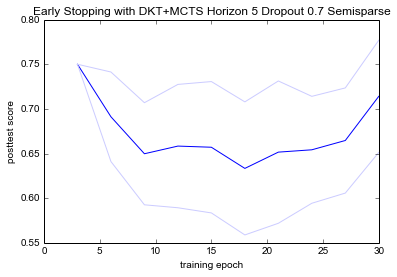

In [2]:
figure()
title('Early Stopping with DKT+MCTS Horizon 5 Dropout 0.7 Semisparse')
xlabel('training epoch')
ylabel('posttest score')

data = np.array([
    [0.75, 0.57291666666666663, 0.75, 0.74479166666666663, 0.78385416666666663, 0.71875, 0.8359375, 0.80989583333333337, 0.7890625, 0.87239583333333337],
[0.75, 0.74479166666666663, 0.5234375, 0.58854166666666663, 0.63802083333333337, 0.609375, 0.62760416666666663, 0.59635416666666663, 0.5703125, 0.65104166666666663],
[0.75, 0.75, 0.5234375, 0.453125, 0.359375, 0.34635416666666669, 0.37760416666666669, 0.5625, 0.5546875, 0.60416666666666663],
[0.75, 0.66666666666666663, 0.59375, 0.75, 0.63802083333333337, 0.74739583333333337, 0.75, 0.7421875, 0.72395833333333337, 0.77604166666666663],
[0.75, 0.75, 0.66666666666666663, 0.52604166666666663, 0.70052083333333337, 0.53125, 0.53125, 0.5625, 0.63020833333333337, 0.68489583333333337],
[0.75, 0.75, 0.734375, 0.75, 0.64583333333333337, 0.67447916666666663, 0.59895833333333337, 0.59114583333333337, 0.5625, 0.66145833333333337],
[0.75, 0.69791666666666663, 0.74739583333333337, 0.75, 0.75, 0.75, 0.75, 0.74739583333333337, 0.73697916666666663, 0.65104166666666663],
[0.75, 0.73697916666666663, 0.68229166666666663, 0.54166666666666663, 0.5625, 0.625, 0.71875, 0.7578125, 0.80729166666666663, 0.90885416666666663],
[0.75, 0.734375, 0.7421875, 0.75, 0.74739583333333337, 0.58333333333333337, 0.578125, 0.52083333333333337, 0.55989583333333337, 0.60416666666666663],
[0.75, 0.5078125, 0.53385416666666663, 0.72916666666666663, 0.74479166666666663, 0.74739583333333337, 0.74739583333333337, 0.65104166666666663, 0.7109375, 0.7265625],
])

xs = np.array(range(3,33,3))
ys = np.mean(data,axis=0)
err = np.std(data, axis=0)*1.96/np.sqrt(10)

plot(xs, ys, color='#0000ff')
plot(xs, ys+err, color='#ccccff')
plot(xs, ys-err, color='#ccccff')

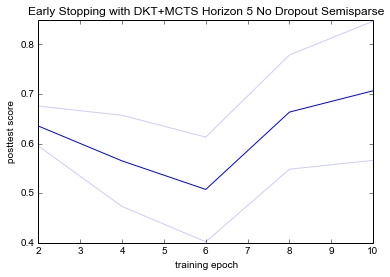

In [5]:
figure()
title('Early Stopping with DKT+MCTS Horizon 5 No Dropout Semisparse')
xlabel('training epoch')
ylabel('posttest score')

data = np.array([
    [0.5625, 0.4140625, 0.359375, 0.48177083333333331, 0.4609375],
[0.59635416666666663, 0.5078125, 0.52864583333333337, 0.72395833333333337, 0.76822916666666663],
[0.65364583333333337, 0.7421875, 0.6640625, 0.9375, 0.99479166666666663],
[0.5625, 0.66145833333333337, 0.5546875, 0.75, 0.9453125],
[0.66666666666666663, 0.25, 0.25, 0.26822916666666669, 0.27864583333333331],
[0.57291666666666663, 0.5, 0.5, 0.59114583333333337, 0.50520833333333337],
[0.75, 0.75, 0.75, 0.88541666666666663, 0.97916666666666663],
[0.61979166666666663, 0.66927083333333337, 0.75260416666666663, 0.75260416666666663, 0.75],
[0.7421875, 0.53125, 0.28385416666666669, 0.578125, 0.63020833333333337],
[0.62760416666666663, 0.625, 0.43229166666666669, 0.66666666666666663, 0.75260416666666663],
])

xs = np.array(range(2,12,2))
ys = np.mean(data,axis=0)
err = np.std(data, axis=0)*1.96/np.sqrt(10)

plot(xs, ys, color='#0000ff')
plot(xs, ys+err, color='#ccccff')
plot(xs, ys-err, color='#ccccff')

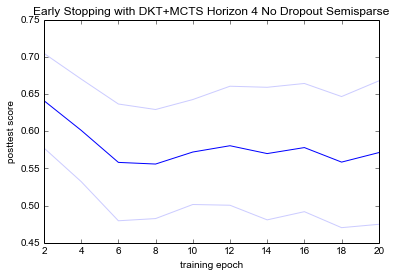

In [2]:
figure()
title('Early Stopping with DKT+MCTS Horizon 4 No Dropout Semisparse')
xlabel('training epoch')
ylabel('posttest score')

data = np.array([
    [0.5234375, 0.52864583333333337, 0.5, 0.50520833333333337, 0.50260416666666663, 0.50260416666666663, 0.5, 0.50260416666666663, 0.515625, 0.5390625],
[0.72135416666666663, 0.50260416666666663, 0.34895833333333331, 0.453125, 0.42708333333333331, 0.359375, 0.37760416666666669, 0.39583333333333331, 0.33854166666666669, 0.38020833333333331],
[0.53125, 0.5703125, 0.51302083333333337, 0.6796875, 0.62760416666666663, 0.546875, 0.5078125, 0.53125, 0.3828125, 0.31770833333333331],
[0.6953125, 0.38802083333333331, 0.328125, 0.53385416666666663, 0.453125, 0.36458333333333331, 0.28645833333333331, 0.3359375, 0.32552083333333331, 0.31770833333333331],
[0.61458333333333337, 0.453125, 0.35416666666666669, 0.421875, 0.421875, 0.4375, 0.37760416666666669, 0.40104166666666669, 0.3984375, 0.421875],
[0.5, 0.50260416666666663, 0.51041666666666663, 0.5, 0.48958333333333331, 0.74479166666666663, 0.50520833333333337, 0.51041666666666663, 0.5390625, 0.5],
[0.67447916666666663, 0.74479166666666663, 0.59114583333333337, 0.55729166666666663, 0.61197916666666663, 0.5703125, 0.57291666666666663, 0.5625, 0.55989583333333337, 0.609375],
[0.75, 0.62239583333333337, 0.703125, 0.5859375, 0.76302083333333337, 0.77083333333333337, 0.78645833333333337, 0.7734375, 0.75520833333333337, 0.75],
[0.5, 0.75260416666666663, 0.65104166666666663, 0.5234375, 0.46354166666666669, 0.46614583333333331, 0.4765625, 0.49479166666666669, 0.48958333333333331, 0.50520833333333337],
[0.72395833333333337, 0.75, 0.73177083333333337, 0.75, 0.72135416666666663, 0.74739583333333337, 0.73697916666666663, 0.7421875, 0.5, 0.5],
[0.4453125, 0.69791666666666663, 0.72395833333333337, 0.60416666666666663, 0.60677083333333337, 0.60677083333333337, 0.59375, 0.61197916666666663, 0.6171875, 0.61979166666666663],
[0.75, 0.66666666666666663, 0.63802083333333337, 0.63541666666666663, 0.6171875, 0.62760416666666663, 0.65364583333333337, 0.58854166666666663, 0.56510416666666663, 0.640625],
[0.71875, 0.67447916666666663, 0.72395833333333337, 0.74739583333333337, 0.75, 0.73697916666666663, 0.75, 0.7265625, 0.7109375, 0.72916666666666663],
[0.72916666666666663, 0.625, 0.75, 0.74479166666666663, 0.75, 0.75, 0.75, 0.76822916666666663, 0.78385416666666663, 0.94010416666666663],
[0.67447916666666663, 0.56770833333333337, 0.5, 0.5, 0.5, 0.6640625, 0.7265625, 0.81510416666666663, 0.81770833333333337, 0.77864583333333337],
[0.65364583333333337, 0.5, 0.50260416666666663, 0.6171875, 0.59114583333333337, 0.5, 0.5, 0.5, 0.5, 0.5],
[0.80208333333333337, 0.72395833333333337, 0.5, 0.5, 0.5, 0.5, 0.6640625, 0.67447916666666663, 0.68489583333333337, 0.66666666666666663],
[0.61458333333333337, 0.75, 0.5078125, 0.5, 0.5, 0.50260416666666663, 0.50260416666666663, 0.5078125, 0.5078125, 0.51302083333333337],
[0.69791666666666663, 0.50260416666666663, 0.50520833333333337, 0.5078125, 0.69791666666666663, 0.7109375, 0.71875, 0.703125, 0.70572916666666663, 0.69010416666666663],
[0.5, 0.5, 0.578125, 0.25, 0.4453125, 0.5, 0.41145833333333331, 0.4140625, 0.47135416666666669, 0.50520833333333337],
])

xs = np.array(range(2,22,2))
ys = np.mean(data,axis=0)
err = np.std(data, axis=0)*1.96/np.sqrt(10)

plot(xs, ys, color='#0000ff')
plot(xs, ys+err, color='#ccccff')
plot(xs, ys-err, color='#ccccff')

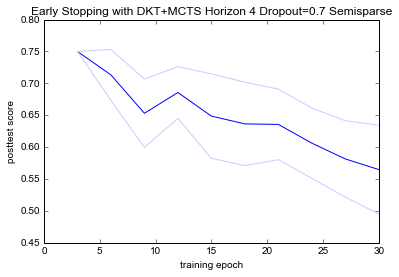

In [2]:
figure()
title('Early Stopping with DKT+MCTS Horizon 4 Dropout=0.7 Semisparse')
xlabel('training epoch')
ylabel('posttest score')

data = np.array([
    [0.75, 0.71875, 0.59635416666666663, 0.59895833333333337, 0.56510416666666663, 0.640625, 0.63802083333333337, 0.625, 0.640625, 0.62760416666666663],
[0.75, 0.75, 0.73697916666666663, 0.72135416666666663, 0.76041666666666663, 0.734375, 0.72916666666666663, 0.63020833333333337, 0.49739583333333331, 0.43489583333333331],
[0.75, 0.75, 0.67447916666666663, 0.69010416666666663, 0.48697916666666669, 0.47395833333333331, 0.52864583333333337, 0.45833333333333331, 0.69010416666666663, 0.70833333333333337],
[0.75, 0.5390625, 0.70052083333333337, 0.76302083333333337, 0.74739583333333337, 0.7421875, 0.6875, 0.60677083333333337, 0.63802083333333337, 0.67708333333333337],
[0.75, 0.75, 0.7421875, 0.71354166666666663, 0.50520833333333337, 0.52083333333333337, 0.5234375, 0.53645833333333337, 0.4375, 0.4296875],
[0.75, 0.75, 0.50260416666666663, 0.56510416666666663, 0.59895833333333337, 0.703125, 0.70052083333333337, 0.72916666666666663, 0.52083333333333337, 0.4375],
[0.75, 0.65625, 0.6484375, 0.703125, 0.75, 0.75, 0.74739583333333337, 0.72135416666666663, 0.734375, 0.703125],
[0.75, 0.72395833333333337, 0.71354166666666663, 0.74479166666666663, 0.74739583333333337, 0.73958333333333337, 0.71614583333333337, 0.69270833333333337, 0.62760416666666663, 0.59895833333333337],
[0.75, 0.75, 0.5, 0.74479166666666663, 0.75, 0.53385416666666663, 0.5, 0.484375, 0.44791666666666669, 0.4375],
[0.75, 0.74479166666666663, 0.71614583333333337, 0.61197916666666663, 0.57552083333333337, 0.52604166666666663, 0.5859375, 0.578125, 0.58072916666666663, 0.59375],
])

xs = np.array(range(3,33,3))
ys = np.mean(data,axis=0)
err = np.std(data, axis=0)*1.96/np.sqrt(10)

plot(xs, ys, color='#0000ff')
plot(xs, ys+err, color='#ccccff')
plot(xs, ys-err, color='#ccccff')

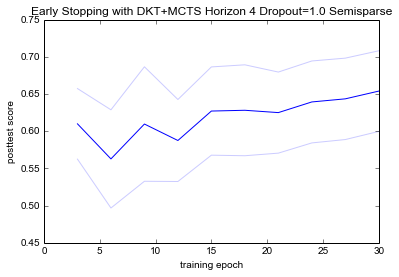

In [2]:
figure()
title('Early Stopping with DKT+MCTS Horizon 4 Dropout=1.0 Semisparse')
xlabel('training epoch')
ylabel('posttest score')

data = np.array([
    [0.70833333333333337, 0.41927083333333331, 0.3984375, 0.53645833333333337, 0.69791666666666663, 0.73177083333333337, 0.73177083333333337, 0.72916666666666663, 0.73958333333333337, 0.72395833333333337],
[0.61458333333333337, 0.48177083333333331, 0.55729166666666663, 0.5546875, 0.53645833333333337, 0.515625, 0.5234375, 0.53645833333333337, 0.52864583333333337, 0.54947916666666663],
[0.625, 0.56770833333333337, 0.65885416666666663, 0.50260416666666663, 0.50520833333333337, 0.515625, 0.52083333333333337, 0.51302083333333337, 0.52083333333333337, 0.52864583333333337],
[0.75, 0.75, 0.75, 0.72395833333333337, 0.765625, 0.75260416666666663, 0.72916666666666663, 0.75520833333333337, 0.7421875, 0.7421875],
[0.640625, 0.5078125, 0.5, 0.5, 0.6796875, 0.64583333333333337, 0.57291666666666663, 0.63020833333333337, 0.58072916666666663, 0.61197916666666663],
[0.59635416666666663, 0.72135416666666663, 0.75, 0.74479166666666663, 0.671875, 0.66927083333333337, 0.65885416666666663, 0.67708333333333337, 0.65104166666666663, 0.66145833333333337],
[0.61979166666666663, 0.45833333333333331, 0.75, 0.66927083333333337, 0.74739583333333337, 0.75, 0.75, 0.75, 0.75, 0.75],
[0.51041666666666663, 0.55989583333333337, 0.51041666666666663, 0.52083333333333337, 0.5234375, 0.52083333333333337, 0.53645833333333337, 0.53125, 0.54166666666666663, 0.52604166666666663],
[0.5, 0.65625, 0.71875, 0.609375, 0.63541666666666663, 0.67447916666666663, 0.66927083333333337, 0.6875, 0.70833333333333337, 0.7109375],
[0.53385416666666663, 0.50520833333333337, 0.50260416666666663, 0.51302083333333337, 0.5078125, 0.50520833333333337, 0.55729166666666663, 0.58333333333333337, 0.671875, 0.734375],
])

xs = np.array(range(3,33,3))
ys = np.mean(data,axis=0)
err = np.std(data, axis=0)*1.96/np.sqrt(10)

plot(xs, ys, color='#0000ff')
plot(xs, ys+err, color='#ccccff')
plot(xs, ys-err, color='#ccccff')

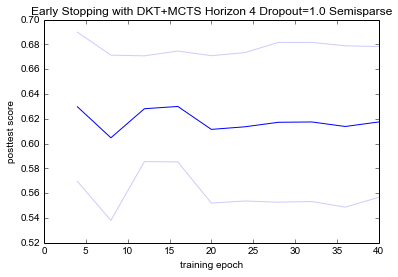

In [2]:
figure()
title('Early Stopping with DKT+MCTS Horizon 4 Dropout=1.0 Semisparse')
xlabel('training epoch')
ylabel('posttest score')

data = np.array([
    [0.64322916666666663, 0.50520833333333337, 0.56770833333333337, 0.703125, 0.7265625, 0.71614583333333337, 0.73697916666666663, 0.73177083333333337, 0.72916666666666663, 0.72135416666666663],
[0.61979166666666663, 0.75260416666666663, 0.66145833333333337, 0.671875, 0.59635416666666663, 0.5546875, 0.53385416666666663, 0.53125, 0.51822916666666663, 0.55729166666666663],
[0.74739583333333337, 0.74479166666666663, 0.71354166666666663, 0.5859375, 0.50520833333333337, 0.50260416666666663, 0.5078125, 0.50260416666666663, 0.5, 0.50260416666666663],
[0.73958333333333337, 0.5, 0.56510416666666663, 0.5859375, 0.53125, 0.58333333333333337, 0.5390625, 0.55989583333333337, 0.5390625, 0.546875],
[0.75, 0.53125, 0.73958333333333337, 0.75520833333333337, 0.74479166666666663, 0.74739583333333337, 0.734375, 0.734375, 0.72395833333333337, 0.71875],
[0.52604166666666663, 0.76822916666666663, 0.66666666666666663, 0.62760416666666663, 0.66927083333333337, 0.70052083333333337, 0.75, 0.7578125, 0.75520833333333337, 0.75520833333333337],
[0.56770833333333337, 0.58854166666666663, 0.6015625, 0.59635416666666663, 0.57552083333333337, 0.55729166666666663, 0.578125, 0.56510416666666663, 0.5625, 0.5625],
[0.5, 0.5, 0.62239583333333337, 0.53645833333333337, 0.50260416666666663, 0.5, 0.50260416666666663, 0.51302083333333337, 0.5, 0.51302083333333337],
[0.5, 0.64322916666666663, 0.64322916666666663, 0.53125, 0.51822916666666663, 0.52864583333333337, 0.54166666666666663, 0.53385416666666663, 0.55989583333333337, 0.55208333333333337],
[0.703125, 0.51302083333333337, 0.5, 0.70572916666666663, 0.74479166666666663, 0.74479166666666663, 0.74739583333333337, 0.74479166666666663, 0.75, 0.74479166666666663],
])

xs = np.array(range(4,44,4))
ys = np.mean(data,axis=0)
err = np.std(data, axis=0)*1.96/np.sqrt(10)

plot(xs, ys, color='#0000ff')
plot(xs, ys+err, color='#ccccff')
plot(xs, ys-err, color='#ccccff')

[-0.00383888 -0.0015511  -0.00103404 -0.00092871 -0.00065282 -0.00048288
 -0.00035702 -0.00024253 -0.00019331]


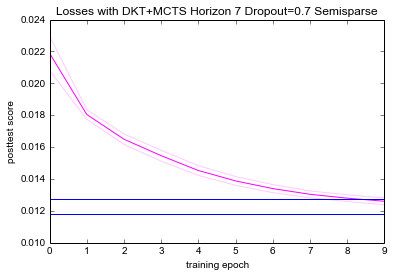

In [50]:
figure()
title('Losses with DKT+MCTS Horizon 7 Dropout=0.7')
xlabel('training epoch')
ylabel('val loss')

vals = np.array([[ 0.02180595,  0.01830598,  0.01732324,  0.01600538,  0.01495266,
0.01362642,  0.01287211,  0.01255698,  0.01219989,  0.01225609,
0.01217162,  0.0121013 ,  0.0120178 ,  0.01188188,  0.01202437,
0.01185956,  0.01191527,  0.01193815,  0.0117435 ,  0.01178941],
[ 0.02044635,  0.01795177,  0.01633845,  0.01575699,  0.01491106,
0.01456354,  0.01419508,  0.01347901,  0.01313693,  0.01278713,
0.01246945,  0.01252481,  0.01222297,  0.01229328,  0.01217237,
0.01228271,  0.01210596,  0.01198399,  0.01206974,  0.01190141],
[ 0.02143676,  0.01756498,  0.01537686,  0.014372  ,  0.01378033,
0.01328804,  0.01285182,  0.01242856,  0.01237426,  0.01204094,
0.0119949 ,  0.01183969,  0.01188268,  0.01184082,  0.01177098,
0.01183592,  0.01173694,  0.01170703,  0.01175622,  0.01167183],
[ 0.02191154,  0.01846668,  0.01718894,  0.01582674,  0.01490545,
0.01421758,  0.01378235,  0.0134482 ,  0.01304061,  0.01284451,
0.01282312,  0.01264271,  0.01262949,  0.01258413,  0.01268092,
0.01257178,  0.01253071,  0.01239205,  0.01235316,  0.01226544],
[ 0.02639671,  0.01871186,  0.01673011,  0.01600714,  0.01509996,
0.01444896,  0.01402916,  0.01331364,  0.01281432,  0.01265857,
0.01249765,  0.01238065,  0.01214932,  0.0121059 ,  0.01210726,
0.01184981,  0.01176189,  0.01172988,  0.01167073,  0.01164625],
[ 0.02155443,  0.01795822,  0.01669972,  0.01585109,  0.0144678 ,
0.01380006,  0.01350319,  0.01299003,  0.01280026,  0.01258896,
0.01243673,  0.01242202,  0.01206545,  0.01206996,  0.01208401,
0.01198226,  0.01198688,  0.01173168,  0.01180217,  0.01160957],
[ 0.02159645,  0.01773154,  0.01583175,  0.01517341,  0.0144667 ,
0.01400503,  0.01342742,  0.01303556,  0.01269201,  0.01278394,
0.0125731 ,  0.01236484,  0.01233131,  0.01212521,  0.01217381,
0.01205445,  0.01192111,  0.01192432,  0.01198624,  0.01182741],
[ 0.02071434,  0.01746813,  0.01640881,  0.0150226 ,  0.01405676,
0.01366977,  0.013418  ,  0.01301624,  0.0129791 ,  0.01277641,
0.01283305,  0.01267223,  0.01259936,  0.01237049,  0.01196297,
0.0119792 ,  0.01187164,  0.01193385,  0.01184214,  0.01175693],
[ 0.02095093,  0.01763539,  0.01595474,  0.01465084,  0.0139213 ,
0.01372763,  0.01330762,  0.01321575,  0.01308371,  0.01301253,
0.01250258,  0.01239829,  0.01240334,  0.01225407,  0.01216651,
0.01209913,  0.01206279,  0.01215127,  0.01195021,  0.01202608],
[ 0.02020205,  0.01766511,  0.01613584,  0.01502242,  0.01428873,
0.01384493,  0.0134499 ,  0.01300162,  0.01285894,  0.01263144,
0.01235581,  0.01212645,  0.01209535,  0.01177207,  0.01166753,
0.01150216,  0.01149783,  0.01130628,  0.01131307,  0.01126988],
[ 0.02245961,  0.01834869,  0.01685259,  0.01567729,  0.01434684,
0.0138527 ,  0.01343186,  0.01327086,  0.01309173,  0.01284662,
0.01277821,  0.01271157,  0.01244855,  0.01238042,  0.01223816,
0.01238018,  0.01214591,  0.0120615 ,  0.01200462,  0.01198275],
[ 0.02092279,  0.01850843,  0.01718208,  0.01638965,  0.01541652,
0.01415677,  0.01359923,  0.01288177,  0.01266903,  0.012454  ,
0.01238585,  0.01219069,  0.01218653,  0.01222322,  0.01216385,
0.01212133,  0.01204203,  0.01196242,  0.01222681,  0.01201853],
[ 0.02285348,  0.01862905,  0.0171356 ,  0.01607934,  0.01488377,
0.01394341,  0.0131163 ,  0.01295121,  0.01269801,  0.01253051,
0.01251411,  0.01228044,  0.01215925,  0.01207086,  0.01200267,
0.01197022,  0.01189207,  0.01180082,  0.01202782,  0.01190692],
[ 0.02281506,  0.01821946,  0.01655139,  0.01553256,  0.01476025,
0.01399517,  0.01321419,  0.01286645,  0.01269193,  0.01235117,
0.0122975 ,  0.01196324,  0.01192197,  0.01188304,  0.01175288,
0.01179517,  0.01174704,  0.01146247,  0.0114408 ,  0.01136711],
[ 0.02636773,  0.0186934 ,  0.01627273,  0.01550199,  0.01395755,
0.01293071,  0.01259756,  0.01240803,  0.01222776,  0.01196506,
0.01190029,  0.0117877 ,  0.01160087,  0.01159603,  0.01154158,
0.01152504,  0.01148047,  0.01138242,  0.01130731,  0.01116754],
[ 0.02250757,  0.01889332,  0.01708569,  0.01577203,  0.01514611,
0.01451858,  0.01392206,  0.01374104,  0.01358258,  0.01352815,
0.01329265,  0.01308567,  0.01291539,  0.01292076,  0.0129048 ,
0.01256569,  0.01239321,  0.01208287,  0.01202537,  0.01188021],
[ 0.02158454,  0.01787245,  0.01600069,  0.01488002,  0.0142044 ,
0.01360887,  0.01307054,  0.01284715,  0.01239294,  0.01223654,
0.0120715 ,  0.01201252,  0.01192514,  0.01190798,  0.0118035 ,
0.01190148,  0.01170601,  0.01190678,  0.01166113,  0.01143089],
[ 0.01951776,  0.01715577,  0.01589333,  0.01462123,  0.01360569,
0.01305008,  0.01296226,  0.01280858,  0.01258588,  0.0125258 ,
0.01235845,  0.01267789,  0.01240988,  0.01239737,  0.01221865,
0.0124332 ,  0.01229488,  0.01229361,  0.01219799,  0.01200915],
[ 0.0208288 ,  0.01774957,  0.01682379,  0.01593651,  0.01460327,
0.01390983,  0.01341093,  0.01315559,  0.01285881,  0.01249282,
0.01254576,  0.01247345,  0.01250856,  0.0124135 ,  0.01242182,
0.0121726 ,  0.01218115,  0.01209871,  0.01214165,  0.01208141],
[ 0.02088611,  0.01745164,  0.01617303,  0.01519941,  0.0149292 ,
0.01448993,  0.01382891,  0.01343391,  0.01322081,  0.01282217,
0.01271961,  0.01266951,  0.01241562,  0.012502  ,  0.01235974,
0.01234062,  0.01230162,  0.01229211,  0.01214451,  0.01205611]])

sliceend = 10

xs = np.array(range(20))[:sliceend]

ys_val = np.mean(vals,axis=0)[:sliceend]
err_val = np.std(vals, axis=0)[:sliceend]*1.96/np.sqrt(10)

diffs = np.diff(ys_val)
print(diffs)

plot(xs, ys_val, color='#ff00ff')
plot(xs, ys_val+err_val, color='#ffccff')
plot(xs, ys_val-err_val, color='#ffccff')
#plot(xs[1:], diffs)
plot(xs, np.repeat(0.0118,xs.shape),color='blue')
plot(xs, np.repeat(0.0118+(0.021-0.0118)*0.1,xs.shape),color='blue')
# looks like epoch 9

[-0.00487938 -0.00142185 -0.00076798 -0.00058014 -0.00046777 -0.00037702
 -0.00025753 -0.00018782 -0.00012326]


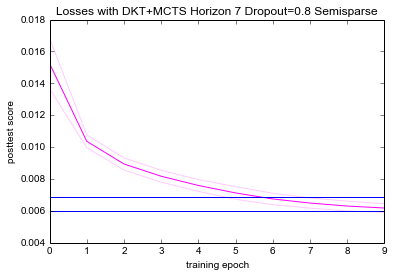

In [48]:
figure()
title('Losses with DKT+MCTS Horizon 7 Dropout=0.8')
xlabel('training epoch')
ylabel('val loss')

vals = np.array([[ 0.01299204,  0.01030124,  0.00929743,  0.00818483,  0.0074209 ,
0.00701988,  0.00665082,  0.00637644,  0.00619324,  0.00604533,
0.00591058,  0.00590011,  0.00578901,  0.00575014,  0.00574093,
0.00558658,  0.00566823,  0.00564665,  0.00558274,  0.00557278],
[ 0.01460038,  0.00994331,  0.00870104,  0.00791132,  0.00739246,
0.00704507,  0.00666825,  0.00645951,  0.00629761,  0.00614995,
0.00597865,  0.00593313,  0.0058546 ,  0.00600976,  0.00584134,
0.00576205,  0.00571163,  0.00595088,  0.00570968,  0.00573738],
[ 0.01405243,  0.00981847,  0.00876941,  0.00837449,  0.00793459,
0.00762501,  0.00729302,  0.00702345,  0.0068756 ,  0.00672876,
0.00648701,  0.00642504,  0.0062954 ,  0.00615714,  0.00611532,
0.00601726,  0.00606572,  0.00601784,  0.00598797,  0.00589806],
[ 0.01408578,  0.0110085 ,  0.00987233,  0.00926074,  0.00839134,
0.00796388,  0.00718275,  0.0064486 ,  0.00623985,  0.00608935,
0.00597855,  0.00587742,  0.00588898,  0.00573176,  0.00577215,
0.00574679,  0.0057578 ,  0.00569813,  0.00573919,  0.00565523],
[ 0.01408058,  0.0105274 ,  0.00910448,  0.00812039,  0.0073751 ,
0.00691564,  0.00661146,  0.00633192,  0.00620518,  0.00602882,
0.00587253,  0.00587353,  0.00585118,  0.0057791 ,  0.00583132,
0.00570518,  0.00585794,  0.00565399,  0.00565819,  0.00562333],
[ 0.01318294,  0.00976225,  0.00841676,  0.00746909,  0.00696176,
0.00653873,  0.00638467,  0.00629658,  0.00610932,  0.00602169,
0.00600905,  0.00602382,  0.00596312,  0.00606133,  0.00593446,
0.00596975,  0.0057649 ,  0.00575249,  0.00587973,  0.00585234],
[ 0.01422579,  0.01034367,  0.00937529,  0.00868039,  0.0083898 ,
0.00824816,  0.00810915,  0.0079248 ,  0.0077923 ,  0.00760615,
0.00739989,  0.00711755,  0.00700806,  0.00673729,  0.0065407 ,
0.00639105,  0.00627291,  0.00610714,  0.00598939,  0.00605488],
[ 0.02051288,  0.0104002 ,  0.00911574,  0.00841872,  0.00729344,
0.0065525 ,  0.00623843,  0.00607543,  0.00577571,  0.00569456,
0.00559996,  0.00558472,  0.00558738,  0.00555664,  0.00549079,
0.00545207,  0.00536299,  0.00548283,  0.0054117 ,  0.00541432],
[ 0.01743814,  0.01146952,  0.00950287,  0.00873933,  0.00825131,
0.00801402,  0.00774176,  0.00753901,  0.0072106 ,  0.00673524,
0.00626188,  0.00594331,  0.005798  ,  0.00575039,  0.00560577,
0.00548057,  0.00541688,  0.00543043,  0.0054175 ,  0.00539451],
[ 0.01446954,  0.01025806,  0.00890356,  0.00825333,  0.00783723,
0.00727708,  0.00665961,  0.00631943,  0.00607632,  0.0059786 ,
0.00591257,  0.0058237 ,  0.00578567,  0.00574738,  0.00576072,
0.00571376,  0.00566335,  0.0056064 ,  0.0056475 ,  0.00560792],
[ 0.01352003,  0.00977664,  0.00873116,  0.00825071,  0.00779791,
0.00712532,  0.00673005,  0.00628229,  0.00609888,  0.00608023,
0.00594256,  0.00591467,  0.0057247 ,  0.00585427,  0.0057237 ,
0.00569575,  0.00565295,  0.00561893,  0.00561373,  0.00559838],
[ 0.01552108,  0.01024676,  0.00844616,  0.00758636,  0.00711263,
0.00673687,  0.0065398 ,  0.00645524,  0.00626191,  0.00615848,
0.00611462,  0.00604954,  0.00603954,  0.005987  ,  0.00591304,
0.00583152,  0.00591513,  0.00597182,  0.00574951,  0.00586121],
[ 0.01986638,  0.00994594,  0.00796858,  0.00723115,  0.0067398 ,
0.00637101,  0.00610579,  0.00591504,  0.00578823,  0.00576683,
0.00563598,  0.00562601,  0.00559039,  0.00563915,  0.00569439,
0.00552369,  0.00547434,  0.00549338,  0.00545552,  0.00556255],
[ 0.01434547,  0.01091595,  0.00966752,  0.00900818,  0.00860855,
0.0082548 ,  0.00756564,  0.00693649,  0.0066567 ,  0.00643684,
0.00626351,  0.00615346,  0.00608132,  0.00603065,  0.00594924,
0.00597016,  0.00596417,  0.00592469,  0.00588491,  0.00582819],
[ 0.0164275 ,  0.0102392 ,  0.00852196,  0.00805516,  0.00730254,
0.00638596,  0.00600189,  0.00596357,  0.00575166,  0.0057133 ,
0.00610284,  0.00563913,  0.00573129,  0.00559437,  0.00564245,
0.00553919,  0.00569884,  0.00561812,  0.00555147,  0.00548939],
[ 0.01400138,  0.01045168,  0.00958824,  0.00884399,  0.00836182,
0.00776707,  0.0071423 ,  0.00672583,  0.00655437,  0.00631221,
0.00626426,  0.00603698,  0.00603457,  0.00603531,  0.00599225,
0.00584653,  0.00578153,  0.00578414,  0.00573125,  0.00577559],
[ 0.01302196,  0.00978216,  0.00794744,  0.00709519,  0.00661596,
0.00627834,  0.0060882 ,  0.00602439,  0.00597574,  0.00602426,
0.00586222,  0.00593498,  0.00583919,  0.00579162,  0.00579551,
0.00579462,  0.00572907,  0.00570431,  0.00582043,  0.00573271],
[ 0.01235755,  0.01016999,  0.00894277,  0.0083389 ,  0.00782522,
0.00703691,  0.00652048,  0.00629688,  0.00613664,  0.00605541,
0.00593891,  0.00567403,  0.00561156,  0.00554757,  0.00553442,
0.00547171,  0.00536749,  0.0053755 ,  0.00532264,  0.00531665],
[ 0.01469616,  0.00956976,  0.00795981,  0.00714774,  0.00666839,
0.00625838,  0.00600402,  0.00590909,  0.00577047,  0.00580896,
0.0057065 ,  0.00578565,  0.0057646 ,  0.00564269,  0.0056495 ,
0.00556653,  0.00565671,  0.00563814,  0.00565234,  0.00557451],
[ 0.02150152,  0.01238128,  0.01004245,  0.00854547,  0.00763192,
0.00714261,  0.00677873,  0.00656231,  0.00633957,  0.0062097 ,
0.00605364,  0.00596217,  0.00587876,  0.00588841,  0.00584257,
0.00579282,  0.00575788,  0.00570706,  0.00567425,  0.00565366]])

sliceend = 10

xs = np.array(range(20))[:sliceend]

ys_val = np.mean(vals,axis=0)[:sliceend]
err_val = np.std(vals, axis=0)[:sliceend]*1.96/np.sqrt(10)

diffs = np.diff(ys_val)
print(diffs)

plot(xs, ys_val, color='#ff00ff')
plot(xs, ys_val+err_val, color='#ffccff')
plot(xs, ys_val-err_val, color='#ffccff')
#plot(xs[1:], diffs)
plot(xs, np.repeat(0.006,xs.shape),color='blue')
plot(xs, np.repeat(0.006+(0.015-0.006)*0.1,xs.shape),color='blue')
# looks like about epoch 7

[ -8.08251050e-03  -1.79850750e-03  -9.80189500e-04  -4.51918500e-04
  -1.79380000e-04  -7.40550000e-05  -3.44685000e-05  -1.68010000e-05
  -8.45150000e-06]


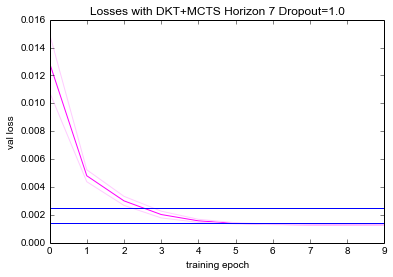

In [18]:
figure()
title('Losses with DKT+MCTS Horizon 7 Dropout=1.0')
xlabel('training epoch')
ylabel('val loss')

vals = np.array([[ 0.01014439,  0.00510824,  0.00348916,  0.00243981,  0.00176729,
0.00146614,  0.00136547,  0.00132089,  0.00129988,  0.00128967,
0.00128455,  0.00128193,  0.00128057,  0.00127986,  0.00127948,
0.00127929,  0.00127918,  0.00127912,  0.00127909,  0.00127907],
[ 0.01214486,  0.00463429,  0.00269096,  0.00169766,  0.00143551,
0.00132118,  0.00128426,  0.0012663 ,  0.00125711,  0.00125234,
0.00124984,  0.00124853,  0.00124784,  0.00124747,  0.00124727,
0.00124717,  0.00124711,  0.00124708,  0.00124707,  0.00124706],
[ 0.00964138,  0.00449875,  0.00312611,  0.0019821 ,  0.00156018,
0.00139268,  0.00131936,  0.00128455,  0.0012671 ,  0.00126014,
0.00125702,  0.00125538,  0.00125451,  0.00125405,  0.0012538 ,
0.00125367,  0.0012536 ,  0.00125356,  0.00125353,  0.00125352],
[ 0.01849133,  0.00491742,  0.0031329 ,  0.00226883,  0.00174553,
0.00148591,  0.00136552,  0.00130988,  0.00128439,  0.00126925,
0.00126011,  0.00125645,  0.00125464,  0.00125371,  0.00125319,
0.00125292,  0.00125277,  0.00125268,  0.00125264,  0.00125261],
[ 0.01307199,  0.00519007,  0.0036572 ,  0.00259923,  0.00194434,
0.00156617,  0.00139195,  0.00131564,  0.00127941,  0.00126119,
0.00125169,  0.00124669,  0.00124403,  0.00124296,  0.00124213,
0.00124169,  0.00124135,  0.00124115,  0.00124103,  0.00124096],
[ 0.01502861,  0.00482978,  0.00337122,  0.00209482,  0.00155726,
0.00139133,  0.00132033,  0.00128653,  0.00127012,  0.00126146,
0.00125696,  0.00125473,  0.00125351,  0.00125287,  0.00125253,
0.00125235,  0.00125225,  0.0012522 ,  0.00125217,  0.00125215],
[ 0.00799777,  0.00409394,  0.00256587,  0.00178233,  0.00149176,
0.00137132,  0.00131493,  0.00128675,  0.00127232,  0.00126475,
0.00126065,  0.00125841,  0.00125717,  0.0012565 ,  0.00125612,
0.00125597,  0.00125585,  0.00125577,  0.00125572,  0.00125569],
[ 0.01359595,  0.00526897,  0.00384502,  0.00320649,  0.00209922,
0.00155989,  0.0013897 ,  0.0013259 ,  0.00129451,  0.0012785 ,
0.00127102,  0.00126749,  0.00126564,  0.00126467,  0.00126416,
0.00126388,  0.00126373,  0.00126364,  0.00126359,  0.00126356],
[ 0.00901113,  0.00410958,  0.00221969,  0.00161392,  0.00141158,
0.00132528,  0.0012839 ,  0.00126316,  0.00125259,  0.00124712,
0.00124426,  0.0012427 ,  0.0012419 ,  0.00124149,  0.00124127,
0.00124115,  0.00124108,  0.00124105,  0.00124103,  0.00124102],
[ 0.01012703,  0.00445538,  0.00268542,  0.0017796 ,  0.0014605 ,
0.00134622,  0.00129412,  0.00126872,  0.00125623,  0.00124999,
0.0012468 ,  0.00124517,  0.00124431,  0.00124386,  0.00124363,
0.0012435 ,  0.00124343,  0.00124339,  0.00124337,  0.00124336],
[ 0.01267866,  0.00415554,  0.0023948 ,  0.00166199,  0.00143908,
0.00135147,  0.0013116 ,  0.00129222,  0.00128248,  0.00127749,
0.00127491,  0.00127357,  0.00127285,  0.00127248,  0.00127228,
0.00127217,  0.00127211,  0.00127208,  0.00127206,  0.00127205],
[ 0.02037043,  0.00665634,  0.0037407 ,  0.00205431,  0.00153586,
0.00138121,  0.00131504,  0.00128193,  0.00126474,  0.00125601,
0.00125158,  0.00124926,  0.00124803,  0.00124738,  0.00124703,
0.00124684,  0.00124674,  0.00124669,  0.00124666,  0.00124664],
[ 0.00904398,  0.00360445,  0.00223379,  0.00168524,  0.00146251,
0.00135994,  0.00130927,  0.00128362,  0.0012703 ,  0.00126333,
0.00125976,  0.00125786,  0.00125684,  0.00125625,  0.00125596,
0.00125581,  0.00125572,  0.00125567,  0.00125565,  0.00125563],
[ 0.01411577,  0.00491084,  0.00302273,  0.0019427 ,  0.00151318,
0.00137507,  0.00131514,  0.00128747,  0.00127408,  0.00126714,
0.00126353,  0.00126162,  0.0012606 ,  0.00126006,  0.00125976,
0.00125961,  0.00125952,  0.00125947,  0.00125945,  0.00125943],
[ 0.0173123 ,  0.00547106,  0.00264539,  0.00169298,  0.00144312,
0.00134508,  0.0012991 ,  0.00127613,  0.00126438,  0.00125828,
0.00125503,  0.00125328,  0.00125243,  0.00125198,  0.00125174,
0.00125162,  0.00125155,  0.00125151,  0.00125149,  0.00125148],
[ 0.01010454,  0.00365091,  0.00206418,  0.00161535,  0.00142329,
0.0013359 ,  0.00129409,  0.00127308,  0.00126239,  0.00125716,
0.00125449,  0.00125304,  0.00125225,  0.00125181,  0.00125158,
0.00125146,  0.00125139,  0.00125139,  0.00125136,  0.00125135],
[ 0.01510439,  0.00507931,  0.0032133 ,  0.0023466 ,  0.0015734 ,
0.00139037,  0.00131307,  0.00126977,  0.00125197,  0.00124564,
0.00124252,  0.0012409 ,  0.00124004,  0.00123958,  0.00123933,
0.0012392 ,  0.00123913,  0.00123909,  0.00123907,  0.00123905],
[ 0.01006959,  0.0047715 ,  0.00335203,  0.00218599,  0.00159894,
0.00140806,  0.0013338 ,  0.00129985,  0.00128301,  0.00127434,
0.00126982,  0.00126738,  0.00126598,  0.00126508,  0.0012646 ,
0.00126433,  0.00126421,  0.00126414,  0.00126411,  0.00126409],
[ 0.01638841,  0.00518121,  0.00344736,  0.00204375,  0.00155661,
0.001392  ,  0.00131964,  0.00128466,  0.00126687,  0.00125757,
0.00125254,  0.00124986,  0.00124845,  0.00124771,  0.00124731,
0.00124711,  0.001247  ,  0.00124694,  0.00124691,  0.00124689],
[ 0.01331694,  0.00552166,  0.00324126,  0.0018416 ,  0.00147777,
0.00134411,  0.00128794,  0.00126181,  0.00124896,  0.00124244,
0.00123905,  0.00123728,  0.00123634,  0.00123583,  0.00123556,
0.00123542,  0.00123534,  0.00123529,  0.00123527,  0.00123526]])

sliceend = 10

xs = np.array(range(20))[:sliceend]

ys_val = np.mean(vals,axis=0)[:sliceend]
err_val = np.std(vals, axis=0)[:sliceend]*1.96/np.sqrt(10)

diffs = np.diff(ys_val)
print(diffs)

plot(xs, ys_val, color='#ff00ff')
plot(xs, ys_val+err_val, color='#ffccff')
plot(xs, ys_val-err_val, color='#ffccff')
#plot(xs[1:], diffs)
plot(xs, np.repeat(0.0014,xs.shape),color='blue')
plot(xs, np.repeat(0.0014+(0.0125-0.0014)*0.1 ,xs.shape),color='blue')
# looks like maybe stop at epoch 3 or 4, so let's settle on epoch 4

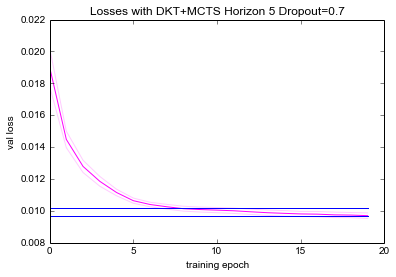

In [5]:
figure()
title('Losses with DKT+MCTS Horizon 5 Dropout=0.7')
xlabel('training epoch')
ylabel('val loss')

data = np.load('experiments/dropoutput1.npz')

vals = data['vals'][0,:,:]

sliceend = 20

xs = np.array(range(20))[:sliceend]

ys_val = np.mean(vals,axis=0)[:sliceend]
err_val = np.std(vals, axis=0)[:sliceend]*1.96/np.sqrt(10)


plot(xs, ys_val, color='#ff00ff')
plot(xs, ys_val+err_val, color='#ffccff')
plot(xs, ys_val-err_val, color='#ffccff')

plot(xs, np.repeat(0.0097,xs.shape),color='blue')
plot(xs, np.repeat(0.0097+(0.019-0.0097)*0.05 ,xs.shape),color='blue')
# with 0.05 threshold, looks like epoch 9

[[ 0.75        0.65885417  0.75        0.75        0.75        0.72135417
   0.5390625   0.67708333  0.50260417  0.56510417  0.63541667  0.64322917
   0.53125     0.51302083  0.5390625 ]
 [ 0.75        0.75        0.75        0.75        0.75        0.75        0.75
   0.75        0.75        0.75        0.75        0.70833333  0.6328125
   0.70572917  0.65625   ]
 [ 0.75        0.75        0.75        0.75        0.578125    0.29427083
   0.49479167  0.48958333  0.50260417  0.51822917  0.54947917  0.61979167
   0.74479167  0.58333333  0.75      ]
 [ 0.74739583  0.75        0.75        0.75        0.7265625   0.63020833
   0.5078125   0.51822917  0.51822917  0.49739583  0.5078125   0.55729167
   0.46614583  0.49739583  0.59895833]
 [ 0.75        0.5         0.5         0.65885417  0.54166667  0.50260417
   0.5         0.5         0.69791667  0.75        0.75        0.75        0.75
   0.55989583  0.5       ]
 [ 0.75        0.75        0.75        0.75        0.87760417  0.9296875
   0.

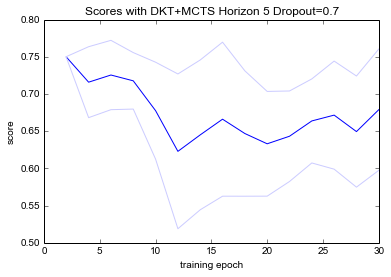

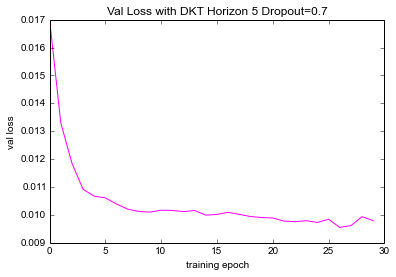

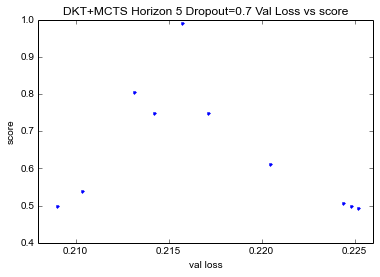

In [9]:
figure()
title('Scores with DKT+MCTS Horizon 5 Dropout=0.7')
xlabel('training epoch')
ylabel('score')

data = np.load('experiments/earlystopping4.npz')

print(data['scores'][:,:])

xs = data['eps'][0,:]
ys = np.mean(data['scores'], axis=0)
err = np.std(data['scores'], axis=0)*1.96/np.sqrt(data['scores'].shape[0])

plot(xs, ys, color='#0000ff')
plot(xs, ys+err, color='#ccccff')
plot(xs, ys-err, color='#ccccff')

figure()
title('Val Loss with DKT Horizon 5 Dropout=0.7')
xlabel('training epoch')
ylabel('val loss')

ys = np.mean(data['vals'][5:6,:], axis=0)
plot(range(ys.shape[0]), ys, color='#ff00ff')

figure()
title('DKT+MCTS Horizon 5 Dropout=0.7 Val Loss vs score')
xlabel('val loss')
ylabel('score')

xs = np.sum(data['vals'][:,:20], axis=1)
ys = data['scores'][:,6]
plot(xs, ys, '.')

[[ 0.61458333  0.5         0.72135417  0.5         0.5         0.5         0.5
   0.5         0.5         0.5         0.5         0.5         0.5
   0.515625    0.5       ]
 [ 0.51822917  0.69791667  0.7109375   0.62760417  0.73958333  0.71614583
   0.73177083  0.75        0.75        0.75        0.75        0.75        0.75
   0.75        0.75      ]
 [ 0.5         0.73958333  0.75        0.72916667  0.74479167  0.75        0.75
   0.75        0.65104167  0.63802083  0.6484375   0.67447917  0.69010417
   0.70052083  0.69791667]
 [ 0.51302083  0.65364583  0.53125     0.76302083  0.77864583  0.62239583
   0.75        0.75        0.75        0.75        0.75        0.75
   0.80208333  0.84895833  0.91666667]
 [ 0.51302083  0.5859375   0.74739583  0.73177083  0.97916667  0.75
   0.7578125   0.7578125   0.76302083  0.7890625   0.7734375   0.8046875
   0.8203125   0.78385417  0.77083333]
 [ 0.5         0.5         0.75520833  0.75        0.70833333  0.73697917
   0.73177083  0.75        0.7

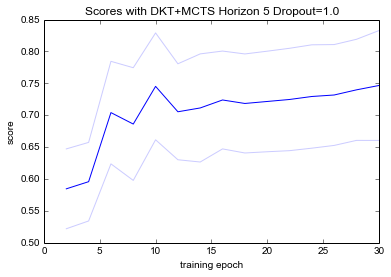

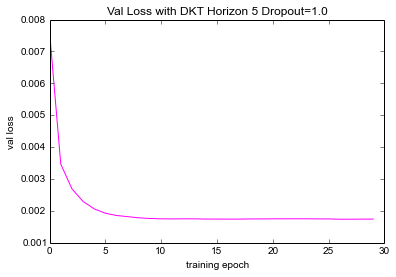

In [23]:
figure()
title('Scores with DKT+MCTS Horizon 5 Dropout=1.0')
xlabel('training epoch')
ylabel('score')

data = np.load('experiments/earlystopping5.npz')

print(data['scores'])

xs = data['eps'][0,:]
ys = np.mean(data['scores'], axis=0)
err = np.std(data['scores'], axis=0)*1.96/np.sqrt(data['scores'].shape[0])

plot(xs, ys, color='#0000ff')
plot(xs, ys+err, color='#ccccff')
plot(xs, ys-err, color='#ccccff')

figure()
title('Val Loss with DKT Horizon 5 Dropout=1.0')
xlabel('training epoch')
ylabel('val loss')

ys = np.mean(data['vals'][:,:], axis=0)
plot(range(ys.shape[0]), ys, color='#ff00ff')
#plot(range(ys.shape[0]), data['vals'][8,:], color='#0000ff')

#figure()
#title('Val Loss vs score')
#xlabel('val loss')
#ylabel('score')

#xs = data['vals'][:,-3]
#ys = data['scores'][:,-2]
#plot(xs, ys, '.')

 0 [0.5000 0.7500 0.7500 0.7500 0.7500 0.7500 0.7474 0.7448]
 1 [0.7500 1.0000 0.7656 0.7500 0.7500 0.7526 0.7500 0.7500]
 2 [0.7188 0.5312 0.6901 0.6068 0.5391 0.5885 0.6120 0.6536]
 3 [0.7031 0.5000 0.2995 0.5521 0.9089 1.0000 1.0000 0.9792]
 4 [0.7318 0.6927 0.7500 0.5573 0.6068 0.6120 0.5365 0.5208]
 5 [0.4193 0.3125 0.4479 0.5130 0.9010 1.0000 0.7500 0.7500]
 6 [0.7500 0.5000 0.5078 0.6042 0.6458 0.6745 0.6146 0.6589]
 7 [0.5391 0.7500 0.7682 0.7552 0.7708 1.0000 0.9922 0.7500]
 8 [0.4505 0.6953 0.7500 0.9010 0.7578 0.7682 0.7839 0.8177]
 9 [0.7500 0.5938 0.6042 0.9271 0.6979 0.5599 0.5729 0.6068]
10 [0.6589 0.7188 0.9688 0.5781 0.5000 0.5078 0.6406 0.6458]
11 [0.7344 0.5807 0.7370 0.6354 0.6328 0.5156 0.7396 0.7500]
12 [0.6615 0.7474 1.0000 1.0000 0.5026 0.5000 0.5000 0.5000]
13 [0.5208 0.5547 0.7005 0.7031 0.7396 0.6641 0.6172 0.6198]
14 [0.5000 0.6354 0.6953 0.6484 0.9870 0.7500 0.7500 0.7500]
15 [0.7292 0.5000 0.5026 0.5078 0.5078 0.5104 0.5078 0.5130]
16 [0.6536 0.7161 0.6328

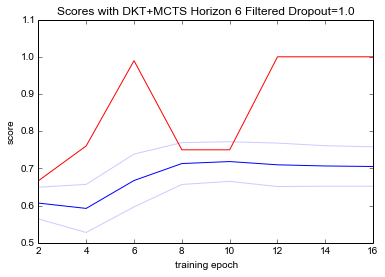

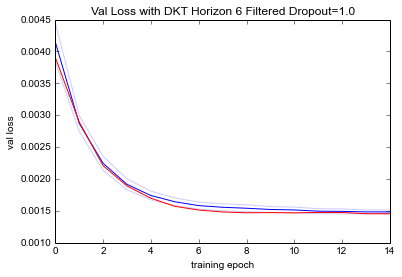

In [37]:
figure()
title('Scores with DKT+MCTS Horizon 6 Filtered Dropout=1.0')
xlabel('training epoch')
ylabel('score')

data1 = np.load('experiments/earlystopping6.npz')
data2 = np.load('experiments/earlystopping7.npz')

scores = np.vstack([data1['scores'], data2['scores']])
vals = np.vstack([data1['vals'], data2['vals']])

for r in six.moves.range(scores.shape[0]):
    six.print_('{:2d} [{}]'.format(r, ' '.join('{:.4f}'.format(x) for x in scores[r,:])))

xs = data1['eps'][0,:]
ys = np.mean(scores[:,:], axis=0)
err = np.std(scores, axis=0)*1.96/np.sqrt(scores.shape[0])

ys2 = scores[25,:]

plot(xs, ys, color='#0000ff')
plot(xs, ys+err, color='#ccccff')
plot(xs, ys-err, color='#ccccff')

plot(xs, ys2, color='#ff0000')

figure()
title('Val Loss with DKT Horizon 6 Filtered Dropout=1.0')
xlabel('training epoch')
ylabel('val loss')

ys = np.mean(vals[:,1:], axis=0)
err = np.std(vals[:,1:], axis=0)*1.96/np.sqrt(scores.shape[0])
plot(range(ys.shape[0]), ys, color='#0000ff')
plot(range(ys.shape[0]), ys+err, color='#ccccff')
plot(range(ys.shape[0]), ys-err, color='#ccccff')
plot(range(ys.shape[0]), vals[25,1:], color='#ff0000')
#plot(range(ys.shape[0]), np.repeat(0.0015, ys.shape), color='#00ff00')
#plot(range(ys.shape[0]), np.repeat(0.00155, ys.shape), color='#00ff00')


six.print_(ys)
#figure()
#title('Val Loss vs score')
#xlabel('val loss')
#ylabel('score')

#xs = data['vals'][:,-3]
#ys = data['scores'][:,-2]
#plot(xs, ys, '.')

Val limit: 0.001503
Val threshold using sig dig 1e-05 is 0.001513


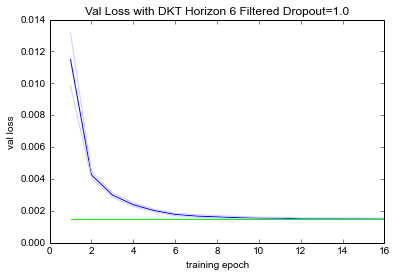

In [66]:
data1 = np.load('experiments/dropoutput2.npz')

vals = data1['vals'][0,:,:]

#for r in six.moves.range(vals.shape[0]):
#    six.print_('{:2d} [{}]'.format(r, ' '.join('{:.4f}'.format(x) for x in vals[r,:])))

figure()
title('Val Loss with DKT Horizon 6 Filtered Dropout=1.0')
xlabel('training epoch')
ylabel('val loss')

xs = np.arange(vals.shape[1]) + 1.0
ys = np.mean(vals, axis=0)
err = np.std(vals, axis=0)*1.96/np.sqrt(vals.shape[0])
plot(xs, ys, color='#0000ff')
plot(xs, ys+err, color='#ccccff')
plot(xs, ys-err, color='#ccccff')
#ylim(0.001, 0.002)

val_limit = np.mean(ys[-2:])
sig_acc = 0.00001
six.print_('Val limit: {:.4}'.format(val_limit))
six.print_('Val threshold using sig dig {} is {:.4}'.format(sig_acc, val_limit +sig_acc))
plot(xs, np.repeat(val_limit, xs.shape), color='#00ff00')
plot(xs, np.repeat(val_limit + rel_acc*val_limit, xs.shape), color='#00ff00')
# looks like epoch 12 is when val loss has converged within 3 significant digits


Val limit: 0.001756
Val threshold using sig dig 1e-05 is 0.001766


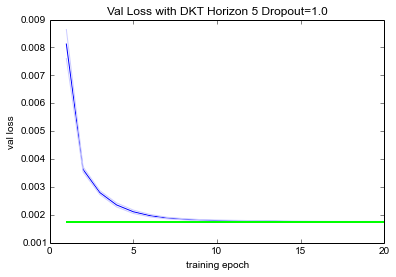

In [77]:
data1 = np.load('experiments/dropoutput3.npz')
data2 = np.load('experiments/earlystopping5.npz')

#vals = data1['vals'][0,:,:]
vals = np.vstack([data1['vals'][0,:,:], data2['vals'][:,:20]])

#for r in six.moves.range(vals.shape[0]):
#    six.print_('{:2d} [{}]'.format(r, ' '.join('{:.4f}'.format(x) for x in vals[r,:])))

figure()
title('Val Loss with DKT Horizon 5 Dropout=1.0')
xlabel('training epoch')
ylabel('val loss')

xs = np.arange(vals.shape[1]) + 1.0
ys = np.mean(vals, axis=0)
err = np.std(vals, axis=0)*1.96/np.sqrt(vals.shape[0])
plot(xs, ys, color='#0000ff')
plot(xs, ys+err, color='#ccccff')
plot(xs, ys-err, color='#ccccff')
#ylim(0.001, 0.002)
#xlim(10,20)

val_limit = np.mean(ys[-2:])
sig_acc = 0.00001
six.print_('Val limit: {:.4}'.format(val_limit))
six.print_('Val threshold using sig dig {} is {:.4}'.format(sig_acc, val_limit +sig_acc))
plot(xs, np.repeat(val_limit, xs.shape), color='#00ff00')
plot(xs, np.repeat(val_limit + rel_acc*val_limit, xs.shape), color='#00ff00')
# looks like epoch 14 is when val loss has converged within 3 significant digits


Val limit: 0.001267
Val threshold using sig dig 1e-05 is 0.001277


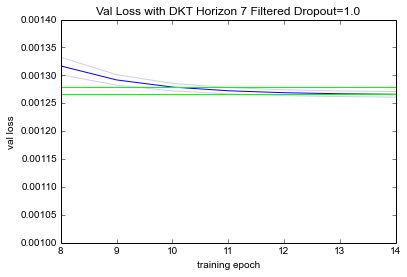

In [83]:
data1 = np.load('experiments/dropoutput4.npz')

vals = data1['vals'][0,:,:]

#for r in six.moves.range(vals.shape[0]):
#    six.print_('{:2d} [{}]'.format(r, ' '.join('{:.4f}'.format(x) for x in vals[r,:])))

figure()
title('Val Loss with DKT Horizon 7 Filtered Dropout=1.0')
xlabel('training epoch')
ylabel('val loss')

xs = np.arange(vals.shape[1]) + 1.0
ys = np.mean(vals, axis=0)
err = np.std(vals, axis=0)*1.96/np.sqrt(vals.shape[0])
plot(xs, ys, color='#0000ff')
plot(xs, ys+err, color='#ccccff')
plot(xs, ys-err, color='#ccccff')
ylim(0.001, 0.0014)
xlim(8,14)

val_limit = np.mean(ys[-2:])
sig_acc = 0.00001
six.print_('Val limit: {:.4}'.format(val_limit))
six.print_('Val threshold using sig dig {} is {:.4}'.format(sig_acc, val_limit +sig_acc))
plot(xs, np.repeat(val_limit, xs.shape), color='#00ff00')
plot(xs, np.repeat(val_limit + rel_acc*val_limit, xs.shape), color='#00ff00')
# looks like epoch 10 is when val loss has converged within 3 significant digits


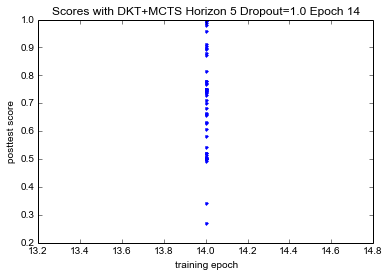

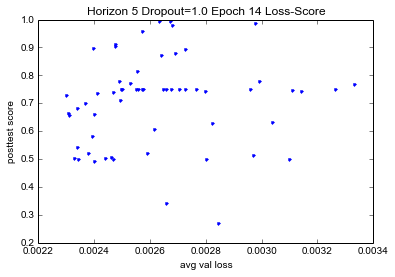

In [40]:
data1 = np.load('experiments/earlystopping8.npz')
data2 = np.load('experiments/earlystopping10.npz')

vals = np.vstack([data1['vals'], data2['vals']])
val_avg = np.mean(vals, axis=1)

scores = np.concatenate([data1['scores'][:,0],data2['scores'][:,0]])

#for r in six.moves.range(vals.shape[0]):
#    six.print_('{:2d} [{}]'.format(r, ' '.join('{:.4f}'.format(x) for x in vals[r,:])))

#for r in six.moves.range(val_sums.shape[0]):
#    six.print_('{:2d} {:.5f} {:.4f}'.format(r, val_avg[r], scores[r]))

figure()
title('Scores with DKT+MCTS Horizon 5 Dropout=1.0 Epoch 14')
xlabel('training epoch')
ylabel('posttest score')

xs = np.concatenate([data1['eps'],data2['eps']])
ys = scores

plot(xs, ys, '.', color='#0000ff')

figure()
title('Horizon 5 Dropout=1.0 Epoch 14 Loss-Score')
xlabel('avg val loss')
ylabel('posttest score')
xs = val_avg
ys = scores
plot(xs, ys, '.', color='#0000ff')


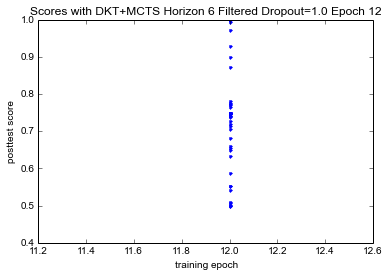

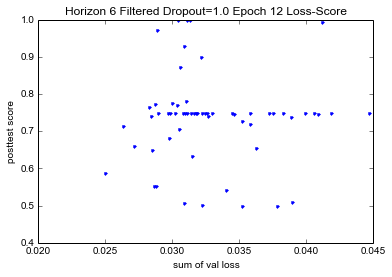

In [45]:
data1 = np.load('experiments/earlystopping9.npz')
data2 = np.load('experiments/earlystopping11.npz')

vals = np.vstack([data1['vals'],data2['vals']])
val_sums = np.sum(vals[:,:], axis=1)
scores = np.concatenate([data1['scores'][:,0],data2['scores'][:,0]])

#for r in six.moves.range(vals.shape[0]):
#    six.print_('{:2d} [{}]'.format(r, ' '.join('{:.4f}'.format(x) for x in vals[r,:])))

#for r in six.moves.range(val_sums.shape[0]):
#    six.print_('{:2d} {:.5f} {:.4f}'.format(r, val_sums[r], scores[r]))

figure()
title('Scores with DKT+MCTS Horizon 6 Filtered Dropout=1.0 Epoch 12')
xlabel('training epoch')
ylabel('posttest score')

xs = np.concatenate([data1['eps'],data2['eps']])
ys = scores

plot(xs, ys, '.', color='#0000ff')

figure()
title('Horizon 6 Filtered Dropout=1.0 Epoch 12 Loss-Score')
xlabel('sum of val loss')
ylabel('posttest score')
xs = val_sums
ys = scores
plot(xs, ys, '.', color='#0000ff')


 0 0.6979 3.5845
 1 0.6380 3.0328
 2 1.0000 3.5176
 3 0.7500 3.1657
 4 0.5208 3.6017
 5 0.9062 3.0751
 6 0.7500 3.0099
 7 0.6849 3.5839
 8 0.7500 3.1730
 9 0.9036 3.4734
10 0.5000 3.0675
11 0.7500 3.3549
12 0.7500 3.3046
13 0.7500 3.2964
14 0.5000 3.5954
15 1.0000 3.3843
16 0.7500 3.3653
17 0.7500 2.9623
18 0.5938 2.9451
19 0.7500 3.2618


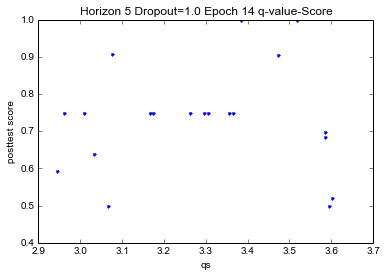

In [9]:
data1 = np.load('experiments/earlystopping12.npz')

vals = data1['vals']
val_sums = np.sum(vals[:,:], axis=1)
scores = data1['scores'][:,0]
qs = data1['qs'][:,0]

for r in six.moves.range(scores.shape[0]):
    six.print_('{:2d} {:.4f} {:.4f}'.format(r, scores[r], qs[r]))

figure()
title('Horizon 5 Dropout=1.0 Epoch 14 q-value-Score')
xlabel('qs')
ylabel('posttest score')
xs = qs
ys = scores
plot(xs, ys, '.', color='#0000ff')


 0 0.7474 3.1491
 1 0.5078 2.9135
 2 0.7500 3.0269
 3 0.6823 3.4048
 4 0.7422 3.1573
 5 0.5885 3.2884
 6 0.6432 3.3142
 7 0.5651 2.8359
 8 0.7656 3.2238
 9 0.5156 3.4572
10 0.7500 2.8391
11 0.6458 2.8400
12 0.7083 3.2307
13 0.5391 2.8642
14 1.0000 3.1811
15 0.5755 3.3506
16 0.5026 3.1444
17 0.5000 3.4041
18 0.7500 3.1979
19 0.7422 2.8727


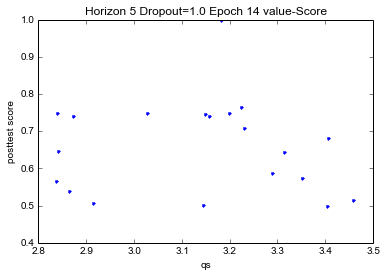

In [2]:
data1 = np.load('experiments/earlystopping13.npz')

vals = data1['vals']
val_sums = np.sum(vals[:,:], axis=1)
scores = data1['scores'][:,0]
qs = data1['qs'][:,0]

for r in six.moves.range(scores.shape[0]):
    six.print_('{:2d} {:.4f} {:.4f}'.format(r, scores[r], qs[r]))

figure()
title('Horizon 5 Dropout=1.0 Epoch 14 value-Score')
xlabel('qs')
ylabel('posttest score')
xs = qs
ys = scores
plot(xs, ys, '.', color='#0000ff')
